In [2]:
import datetime
import matplotlib.font_manager as fm
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import phik
import scipy.stats as stats
import seaborn as sns
import statsmodels.api as sm
import warnings
from tqdm.notebook import tqdm
warnings.filterwarnings('ignore')
%config InlineBackend.figure_format = 'retina'
sns.set_theme(context='talk', style='whitegrid', palette='deep')
plt.rcParams['figure.figsize'] = 10, 7
plt.rcParams['font.size'] = 20
plt.rcParams['axes.labelsize'] = 25
plt.rcParams['figure.titlesize'] = 32
plt.rcParams['axes.titlesize'] = 32
plt.rcParams['savefig.format'] = 'pdf'
plt.rcParams['figure.autolayout'] = 'true'
plt.rcParams['figure.frameon'] = 'false'
plt.rcParams['axes.spines.left'] = 'false'
plt.rcParams['axes.spines.right'] = 'false'
plt.rcParams['axes.spines.top'] = 'false'
plt.rcParams['legend.fancybox'] = 'false'
plt.rcParams['axes.spines.bottom'] = 'false'
plt.rcParams['font.size'] = 20
plt.rcParams['figure.facecolor'] = 'white'
plt.rcParams['axes.facecolor'] = 'white'
# для графиков, где надо много цветов, юзайте воть:
sns.set_palette(sns.color_palette('deep'))
# а по дефолту воть:
sns.set_palette(sns.color_palette('BuGn_r', n_colors=10)[2::3])
pd.set_option('display.max_columns', 60)

In [3]:
feeding_details_22 = pd.read_csv('datasets/2022-feeding-tasks-details.csv', on_bad_lines='skip')
feeding_22 = pd.read_csv('datasets/2022-feeding-tasks.csv', on_bad_lines='skip')

feeding_details_23 = pd.read_csv('datasets/2023-feeding-tasks-details.csv', on_bad_lines='skip')
feeding_23 = pd.read_csv('datasets/2023-feeding-tasks.csv', on_bad_lines='skip')

feeding_details_24 = pd.read_csv('datasets/2024-feeding-tasks-details.csv', on_bad_lines='skip')
feeding_24 = pd.read_csv('datasets/2024-feeding-tasks.csv', on_bad_lines='skip')

feeding_details_25 = pd.read_csv('datasets/2025-feeding-tasks-details.csv', on_bad_lines='skip')
feeding_25 = pd.read_csv('datasets/2025-feeding-tasks.csv', on_bad_lines='skip')

In [4]:
monthly_feeding = pd.read_excel('smth.xlsx', sheet_name='Feeding (monthly)', header=1, skiprows=[2])
herd_metrics = pd.read_excel('smth.xlsx', sheet_name='Herd maintenance', header=1, skiprows=[2]).replace('-', np.nan)
production_indicators = pd.read_excel('smth.xlsx', sheet_name='Dairy indicators', header=1, skiprows=[2]).replace('-', np.nan)

In [5]:
feeding_details_23.IngredientName.unique()

array(['Солома (общ.)', 'Кукуруза', 'Комбикорм 10 группы', 'Шрот соевый',
       'Шрот рапсовый', 'Кукуруза плющеная', '2201.02.01.01.2.22',
       '2201.03.05.02.1.22', 'Патока свекловичная', 'Вода',
       'Комбикорм 2 группы', 'Сено луговое', 'Комбикорм 3.1 группы',
       'Премикс Молодняк 9-12', 'Остатки', 'Молоко', 'ЗЦМ',
       'Шаумацид Дринк', 'Электролит', 'Стартер', 'Бустер Милк',
       'Биотек Микс', '2221.01.01.01.1.22', '2221.03.05.02.1.22',
       '5902.01.01.01.1.22', 'Жом свекловичный сухой',
       '5313.06.05.02.1.22', '2221.04.05.02.1.21', '2501.03.01.01.1.22',
       'Комбикорм №11 ЭНА Восток', '2501.06.05.02.1.22',
       '3636.01.03.01.1.21', '2501.04.10.01.1.22',
       'Комбикорм № 3 престартер гранул.', '3645.01.01.01.1.22', 'Сорго',
       'Комбикорм 11 группы', '3645.03.05.02.1.22', 'Соль',
       'Премикс Дойный А', 'Сода', 'Пшеница', '5204.01.01.01.1.22',
       '5100.01.01.01.1.22', '5001.02.05.02.1.22', 'Мел',
       'Премикс Транзит А', 'Мегабуст Румен

In [6]:
def merge_tables() -> pd.DataFrame:
    '''
    Merges all feeding dataframes with all details dataframes
    returns: merged dataframe
    rtype: pd.DataFrame
    '''
    feeding_22['year'] = '2022'
    feeding_23['year'] = '2023'
    feeding_24['year'] = '2024'
    feeding_25['year'] = '2025'
    feeding_details_22['year'] = '2022'
    feeding_details_23['year'] = '2023'
    feeding_details_24['year'] = '2024'
    feeding_details_25['year'] = '2025'

    feeding_all = pd.concat([feeding_22, feeding_23, feeding_24, feeding_25], ignore_index=True)
    feeding_details_all = pd.concat([feeding_details_22, feeding_details_23, feeding_details_24, feeding_details_25], ignore_index=True)
    
    return feeding_all.merge(feeding_details_all, on=['FeedingTaskID', 'SectionID', 'year', 'PhysiologicalGroupID', 'PhysiologicalGroupName'], how='left'), feeding_all, feeding_details_all

In [7]:
monthly = pd.read_csv('datasets/monthly_vectors.csv')

In [8]:
feeding_and_details, feeding_all, feeding_details_all = merge_tables()

In [9]:
monthly.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7245 entries, 0 to 7244
Data columns (total 10 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Unnamed: 0              7245 non-null   int64  
 1   year_month              7245 non-null   object 
 2   FarmName                7245 non-null   object 
 3   PhysiologicalGroupName  7245 non-null   object 
 4   Concentrate             7245 non-null   float64
 5   Forage                  7245 non-null   float64
 6   VitaminMineral          7245 non-null   float64
 7   Water                   7245 non-null   float64
 8   pca1                    7245 non-null   float64
 9   pca2                    7245 non-null   float64
dtypes: float64(6), int64(1), object(3)
memory usage: 566.1+ KB


In [10]:
feeding_all.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2155378 entries, 0 to 2155377
Data columns (total 14 columns):
 #   Column                       Dtype  
---  ------                       -----  
 0   FeedingTaskID                object 
 1   Date                         object 
 2   FarmName                     object 
 3   FeedNumber                   int64  
 4   SectionID                    int64  
 5   PhysiologicalGroupID         int64  
 6   PhysiologicalGroupName       object 
 7   PhysiologicalGroupHeadCount  int64  
 8   Appetite                     float64
 9   RationName                   object 
 10  RationPart                   float64
 11  TotalWeight_kg               float64
 12  CompletedAt                  object 
 13  year                         object 
dtypes: float64(3), int64(4), object(7)
memory usage: 230.2+ MB


In [11]:
feeding_details_all.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16443079 entries, 0 to 16443078
Data columns (total 9 columns):
 #   Column                  Dtype  
---  ------                  -----  
 0   FeedingTaskID           object 
 1   SectionID               int64  
 2   PhysiologicalGroupID    int64  
 3   PhysiologicalGroupName  object 
 4   IngredientID            int64  
 5   IngredientName          object 
 6   IngredientType          object 
 7   PhysicalWeight_kg       float64
 8   year                    object 
dtypes: float64(1), int64(3), object(5)
memory usage: 1.1+ GB


In [12]:
feeding_and_details.IngredientName.unique().shape

(1851,)

In [13]:
import re
from collections import Counter
def normalize_name(s):
    if pd.isna(s):
        return ''
    s = str(s).strip()
    s = s.replace('//', '/')
    s = re.sub(r'\s+', ' ', s)
    s = s.lower()
    return s
feeding_and_details['norm_ingr_name'] = feeding_and_details['IngredientName'].apply(normalize_name)

In [14]:
code_re = re.compile(r'^\d+(?:\.\d+)+$') #Честно сам писал (100%)
feeding_and_details['is_code'] = feeding_and_details['norm_ingr_name'].str.match(code_re)
feeding_and_details['is_code'].sum()

np.int64(5104161)

In [15]:
feeding_and_details['norm_ingr_name'].nunique()

1821

In [16]:
smth = pd.ExcelFile('smth.xlsx')
nsi = smth.sheet_names[0]

In [17]:
cultures = pd.read_excel(
    smth,
    sheet_name=nsi,
    usecols='B:C',
    skiprows=81,
    nrows=40 
)
cultures.columns = ['code', 'name']
cultures.head()

code               name
0   1.0            Люцерна
1   2.0           Эспарцет
2   3.0  Многолетние травы
3   4.0      Луговые травы
4   5.0           Кукуруза

In [18]:
razdels = pd.read_excel(
    smth,
    sheet_name=nsi,
    usecols='E:H',
    skiprows=81,
    nrows=88  
)
razdels.columns = ['code', 'region', 'prop_farm_name', 'farm_name']
razdels.head()


code   region prop_farm_name          farm_name
0  2501  Воронеж     ЭНА Восток          ЖК Бобров
1  2371  Воронеж     ЭНА Восток  ЖК Верхний Икорец
2  2281  Воронеж     ЭНА Восток   МТФ Владимировка
3  2351  Воронеж     ЭНА Восток  МТФ Петропавловка
4  3637  Воронеж     ЭНА Восток        ЖК Бобров 2

In [19]:
feed_type = pd.read_excel(
    smth,
    sheet_name=nsi,
    usecols='B:C',
    skiprows=123,
    nrows=10
)
feed_type.columns = ['code', 'feed_name']
feed_type.head()

code   feed_name
0   1.0       Сенаж
1   2.0       Силос
2   3.0        Сено
3   4.0      Солома
4   5.0  Концентраы

In [20]:
cultures_map = cultures.set_index('code')['name'].to_dict()
feed_type_map = feed_type.set_index('code')['feed_name'].to_dict()

In [21]:
def decode_ingr_code(code):
    if pd.isna(code) or not isinstance(code, str):
        return code
    parts = code.split('.')
    if len(parts) < 4:
        return code
    try:
        culture_code = float(parts[2])
        feed_code = float(parts[3])
    except ValueError:
        return code    
    culture_name = cultures_map.get(culture_code, str(culture_code))
    feed_name = feed_type_map.get(feed_code, str(feed_code))
    return f'{culture_name} {feed_name}'.lower()

In [22]:
feed_type_map

{1.0: 'Сенаж',
 2.0: 'Силос',
 3.0: 'Сено',
 4.0: 'Солома',
 5.0: 'Концентраы',
 6.0: 'Консервированное зерно',
 7.0: 'Корнаж',
 8.0: 'Сенаж в плёнке',
 9.0: 'Сенаж органический',
 nan: nan}

In [23]:
feeding_and_details['decoded_name'] = feeding_and_details.apply(
    lambda row: decode_ingr_code(row['norm_ingr_name']) if row['is_code'] else row['norm_ingr_name'],
    axis=1
)

feeding_and_details[['norm_ingr_name', 'decoded_name']].head(20)

norm_ingr_name         decoded_name
0       солома покупная      солома покупная
1    3645.01.01.01.1.20        люцерна сенаж
2   комбикорм 10 группы  комбикорм 10 группы
3        кукуруза сухая       кукуруза сухая
4     шрот подсолнечный    шрот подсолнечный
5           шрот соевый          шрот соевый
6         жмых рапсовый        жмых рапсовый
7        жир защищённый       жир защищённый
8    2262.01.05.02.1.21       кукуруза силос
9                  вода                 вода
10      солома покупная      солома покупная
11   3645.01.01.01.1.20        люцерна сенаж
12  комбикорм 10 группы  комбикорм 10 группы
13       кукуруза сухая       кукуруза сухая
14    шрот подсолнечный    шрот подсолнечный
15          шрот соевый          шрот соевый
16        жмых рапсовый        жмых рапсовый
17       жир защищённый       жир защищённый
18   2262.01.05.02.1.21       кукуруза силос
19                 вода                 вода

In [24]:
GROUP_KEYWORDS = {
    'forage': ['силос', 'сенаж', 'сено', 'люцерн', 'сенаж', 'солома', 'зеленая масса', 'зел масса', 'сило', 'сенаж', 'сорго', 'с-ж клевер-тимофеевка 05', 'c-ж клевер-тимофеевка 04', 'с-ж рожь 4'],
    'energy': ['кукуруза', 'пшениц', 'ячмень', 'овёс', 'кукуруза плющ', 'зерно', 'зerno', 'концентрат углевод', 'глюгтен', 'глютен', 'корнаж', 'карнаж', 'карнаж', 'патока свекловичная', 'глицерин', 'патока', 'с-с кукурузный 1', 'с-с кукурузный 01', 'мука кукурузная', 'зск', 'с-с кукурузный алтай', 'с-с кукурузный огнево'],
    'protein': ['шрот', 'жмых', 'соев', 'соевый', 'протеин', 'оболочка сои', 'соя', 'жмых', 'люпин', 'горох', 'бобы', 'белок', 'лен'],
    'fat': ['жир', 'масло', 'пропионат', 'жир защищённый', 'масло соевое'],
    'premix': ['премикс', 'премикс дойн', 'премикс молод', 'премикс транзит', 'премикс'],
    'mineral_vit': ['мел', 'соль', 'витамин', 'минерал', 'известняк', 'кальций', 'фосфат', 'лизунец',  'минвит', 'сода', 'поташ', 'галит брикеты'],
    'additive': ['дрожж', 'пробиот', 'фермент', 'фермент', 'энзим', 'энзимы', 'буфер', 'аквасейф', 'биотек', 'мегабуст', 'электролит', 'кисол', 'шаумацид дринк'],
    'byproduct': ['жом', 'барда', 'жом свекловичный', 'сыворотка', 'дробина', 'зeрноотход', 'остатк', 'остатки'],
    'water': ['вода','влажн','сыворотка молочная','молоко'],
    'premix_blend': ['комбикорм', 'кк', 'кк№', 'кк №', 'комбикорм №', 'комбикорм', 'стартер', 'престартер', 'бустер милк', 'кормосмесь №10 снт', 'кальвобустер', 'бвмк для коров', 'зцм']
}

In [25]:
def classify_ingredient(name):
    if not isinstance(name, str):
        return 'other'
    name_lower = name.lower()
    for group, kat_list in GROUP_KEYWORDS.items():
        for kat in kat_list:
            if kat in name_lower:
                return group
    return 'other'
feeding_and_details['ingredient_group'] = feeding_and_details['decoded_name'].apply(classify_ingredient)
feeding_and_details[['norm_ingr_name', 'decoded_name', 'ingredient_group']].head(20)

norm_ingr_name         decoded_name ingredient_group
0       солома покупная      солома покупная           forage
1    3645.01.01.01.1.20        люцерна сенаж           forage
2   комбикорм 10 группы  комбикорм 10 группы     premix_blend
3        кукуруза сухая       кукуруза сухая           energy
4     шрот подсолнечный    шрот подсолнечный          protein
5           шрот соевый          шрот соевый          protein
6         жмых рапсовый        жмых рапсовый          protein
7        жир защищённый       жир защищённый              fat
8    2262.01.05.02.1.21       кукуруза силос           forage
9                  вода                 вода            water
10      солома покупная      солома покупная           forage
11   3645.01.01.01.1.20        люцерна сенаж           forage
12  комбикорм 10 группы  комбикорм 10 группы     premix_blend
13       кукуруза сухая       кукуруза сухая           energy
14    шрот подсолнечный    шрот подсолнечный          protein
15          шрот соевый          шрот соевый          protein
16        жмых рапсовый        жмых рапсовый          protein
17       жир защищённый       жир защищённый              fat
18   2262.01.05.02.1.21       кукуруза силос           forage
19                 вода                 вода            water

In [26]:
feeding_and_details.ingredient_group.value_counts()

ingredient_group
forage          5947884
energy          2867231
protein         2660328
premix_blend    1013312
water            968343
byproduct        962608
premix           857758
mineral_vit      668368
fat              263131
additive         187220
other             15182
Name: count, dtype: int64

In [27]:
others = feeding_and_details[feeding_and_details['ingredient_group'] == 'other']
others['decoded_name'].value_counts().head(10)

decoded_name
02.01                    1060
03.05                     947
рожь                      942
                          914
с-ж клевер совхоз         801
кормосмесь №11 снт        781
лед                       749
известная мука            740
с-с кукрузный борково     740
мука известковая          624
Name: count, dtype: int64

In [28]:
feeding_and_details.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16411365 entries, 0 to 16411364
Data columns (total 22 columns):
 #   Column                       Dtype  
---  ------                       -----  
 0   FeedingTaskID                object 
 1   Date                         object 
 2   FarmName                     object 
 3   FeedNumber                   int64  
 4   SectionID                    int64  
 5   PhysiologicalGroupID         int64  
 6   PhysiologicalGroupName       object 
 7   PhysiologicalGroupHeadCount  int64  
 8   Appetite                     float64
 9   RationName                   object 
 10  RationPart                   float64
 11  TotalWeight_kg               float64
 12  CompletedAt                  object 
 13  year                         object 
 14  IngredientID                 float64
 15  IngredientName               object 
 16  IngredientType               object 
 17  PhysicalWeight_kg            float64
 18  norm_ingr_name               object 
 19

In [37]:
app_ingr = feeding_and_details.groupby(["Date", "FarmName", "PhysiologicalGroupName", "ingredient_group"]).agg({
    "PhysicalWeight_kg": "sum",
    "Appetite": "mean"
}).reset_index()
app_ingr

Date     FarmName PhysiologicalGroupName ingredient_group  \
0        2022-01-01   ЖК Добрино       Д0 (Новотельные)           energy   
1        2022-01-01   ЖК Добрино       Д0 (Новотельные)              fat   
2        2022-01-01   ЖК Добрино       Д0 (Новотельные)           forage   
3        2022-01-01   ЖК Добрино       Д0 (Новотельные)     premix_blend   
4        2022-01-01   ЖК Добрино       Д0 (Новотельные)          protein   
...             ...          ...                    ...              ...   
2203824  2025-10-22  РМ Торопово         Т3 (9-12 мес.)           premix   
2203825  2025-10-22  РМ Торопово         Т3 (9-12 мес.)          protein   
2203826  2025-10-22  РМ Торопово           Т4 (>1 года)           forage   
2203827  2025-10-22  РМ Торопово           Т4 (>1 года)           premix   
2203828  2025-10-22  РМ Торопово           Т4 (>1 года)          protein   

         PhysicalWeight_kg  Appetite  
0                  518.086       1.0  
1                   23.079       1.0  
2                 3675.000       1.0  
3                  578.000       1.0  
4                  731.000       1.0  
...                    ...       ...  
2203824             22.291       0.8  
2203825            207.000       0.8  
2203826           8069.000       0.8  
2203827             75.866       0.8  
2203828            748.000       0.8  

[2203829 rows x 6 columns]

In [39]:
def rename_shit(dff):
    """Renames bad PhysiologicalGroupNames"""
    mapping = {'Д0 (Новотельные)': 'Д0', 'Н Нетели': 'Нетели', 'Д3 (Предзапуск)': 'Д3', 'D3': 'Д3', 
               'Нетели 1  группа': 'Нетели','Сух-2': "С2", 'Д-3': 'Д3', 'сух 1': 'С1', 'сух 2': 'С2', 'С1 нетели': 'С1', 
               'С2 нетели': 'С2', 'Н НЕТЕЛИ': 'Нетели', 'Сух 2 Нетели': 'С2', 'С2 Нетели': 'С2'}

    dff["PhysiologicalGroupName"] = dff["PhysiologicalGroupName"].replace(mapping)
    return dff

app_ingr = rename_shit(app_ingr)
app_ingr["PhysiologicalGroupName"].unique()

array(['Д0', 'Д1', 'Д2', 'Нетели', 'С1', 'С2', 'Т0 (0-2 мес.)',
       'Т1 (3-5 мес.)', 'Т2 (6-8 мес.)', 'Т3 (9-12 мес.)', 'Т4 (>1 года)',
       'Д3', 'Б0 (0-2 мес.)', 'Т3 9-12', 'Т0', 'Б3 (9-12 мес.)',
       'Т0 (3-5 мес.)', 'Т2', 'МГ Т3', 'Т2 6-8', 'Т4', 'Т3',
       'Б2 (6-8 мес.)', 'Б1 (3-5 мес.)', 'Т4 13-20', 'Телята СВОД Навесы',
       'МГ Т2', 'Т3 (9-12 мес)', 'МП Коровы', 'МП Нетели',
       'МП БП (бык-производитель)', 'Б4 (>1 года)',
       'МП Б1 (6-12 мес. откорм)', 'МП БР2 (>1 года рем.)',
       'МП Т2 (>1 года откорм)', 'МП БР1 (6-12 мес. рем.)',
       'МП ТР1 (6-12 мес. рем.)', 'Телята домики', 'МП Т0 (0-6 мес.)',
       'МП ТР2 (>1 года рем.)', 'МП Б0 (0-6 мес.)',
       'МП Б2 (>1 года откорм)', 'быки племенные', 'Лошади',
       'Т0 (0-2 мес)', 'Коровы'], dtype=object)

In [30]:
feeding_and_details.to_pickle("feeding_and_details.pkl")

In [34]:
app_ingr['ingredient_group'].unique()

array(['energy', 'fat', 'forage', 'premix_blend', 'protein', 'water',
       'other', 'mineral_vit', 'premix', 'additive', 'byproduct'],
      dtype=object)

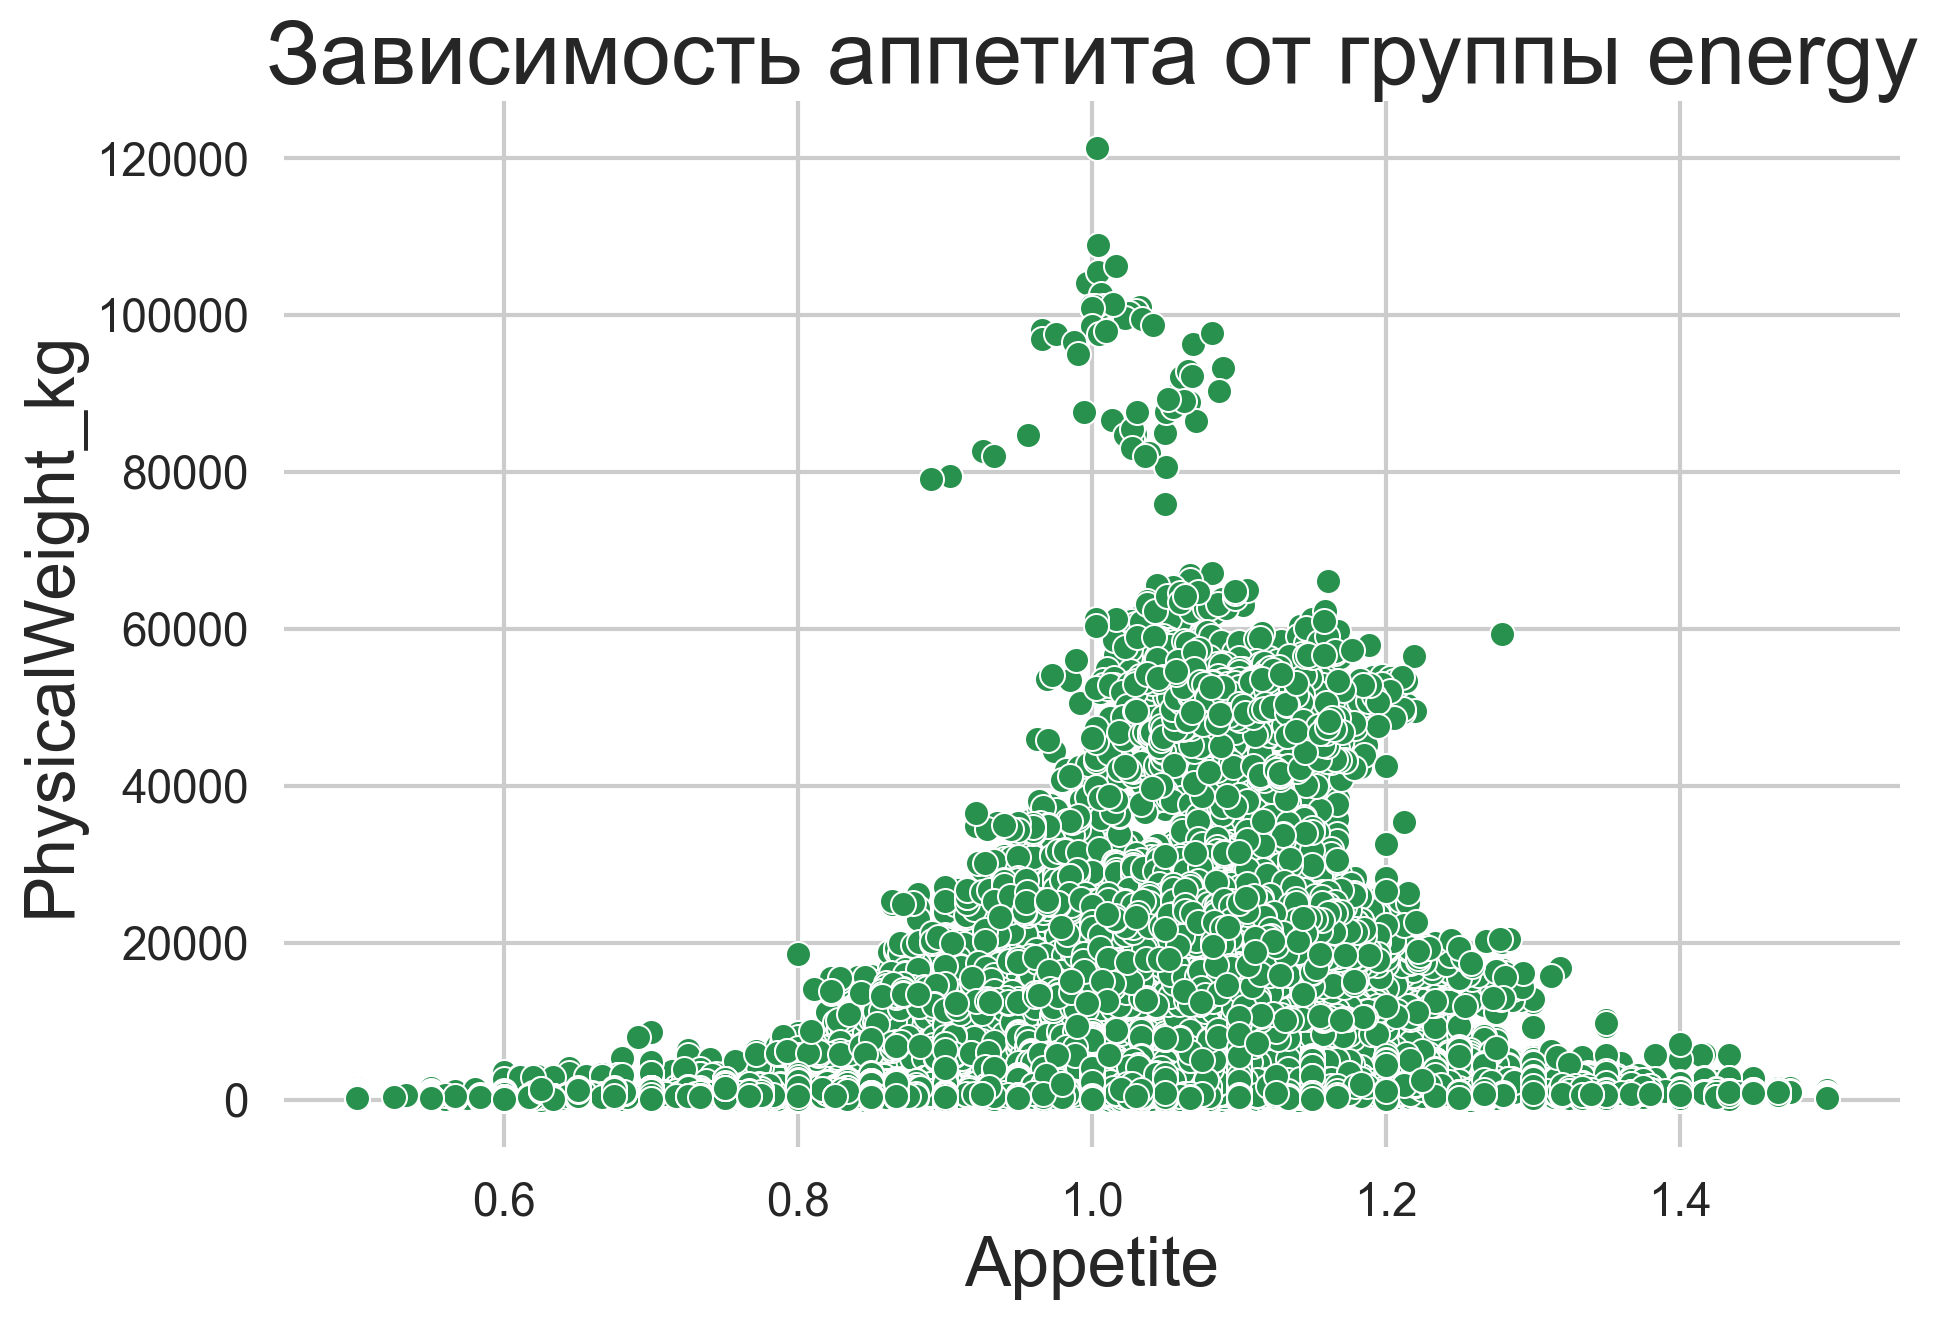

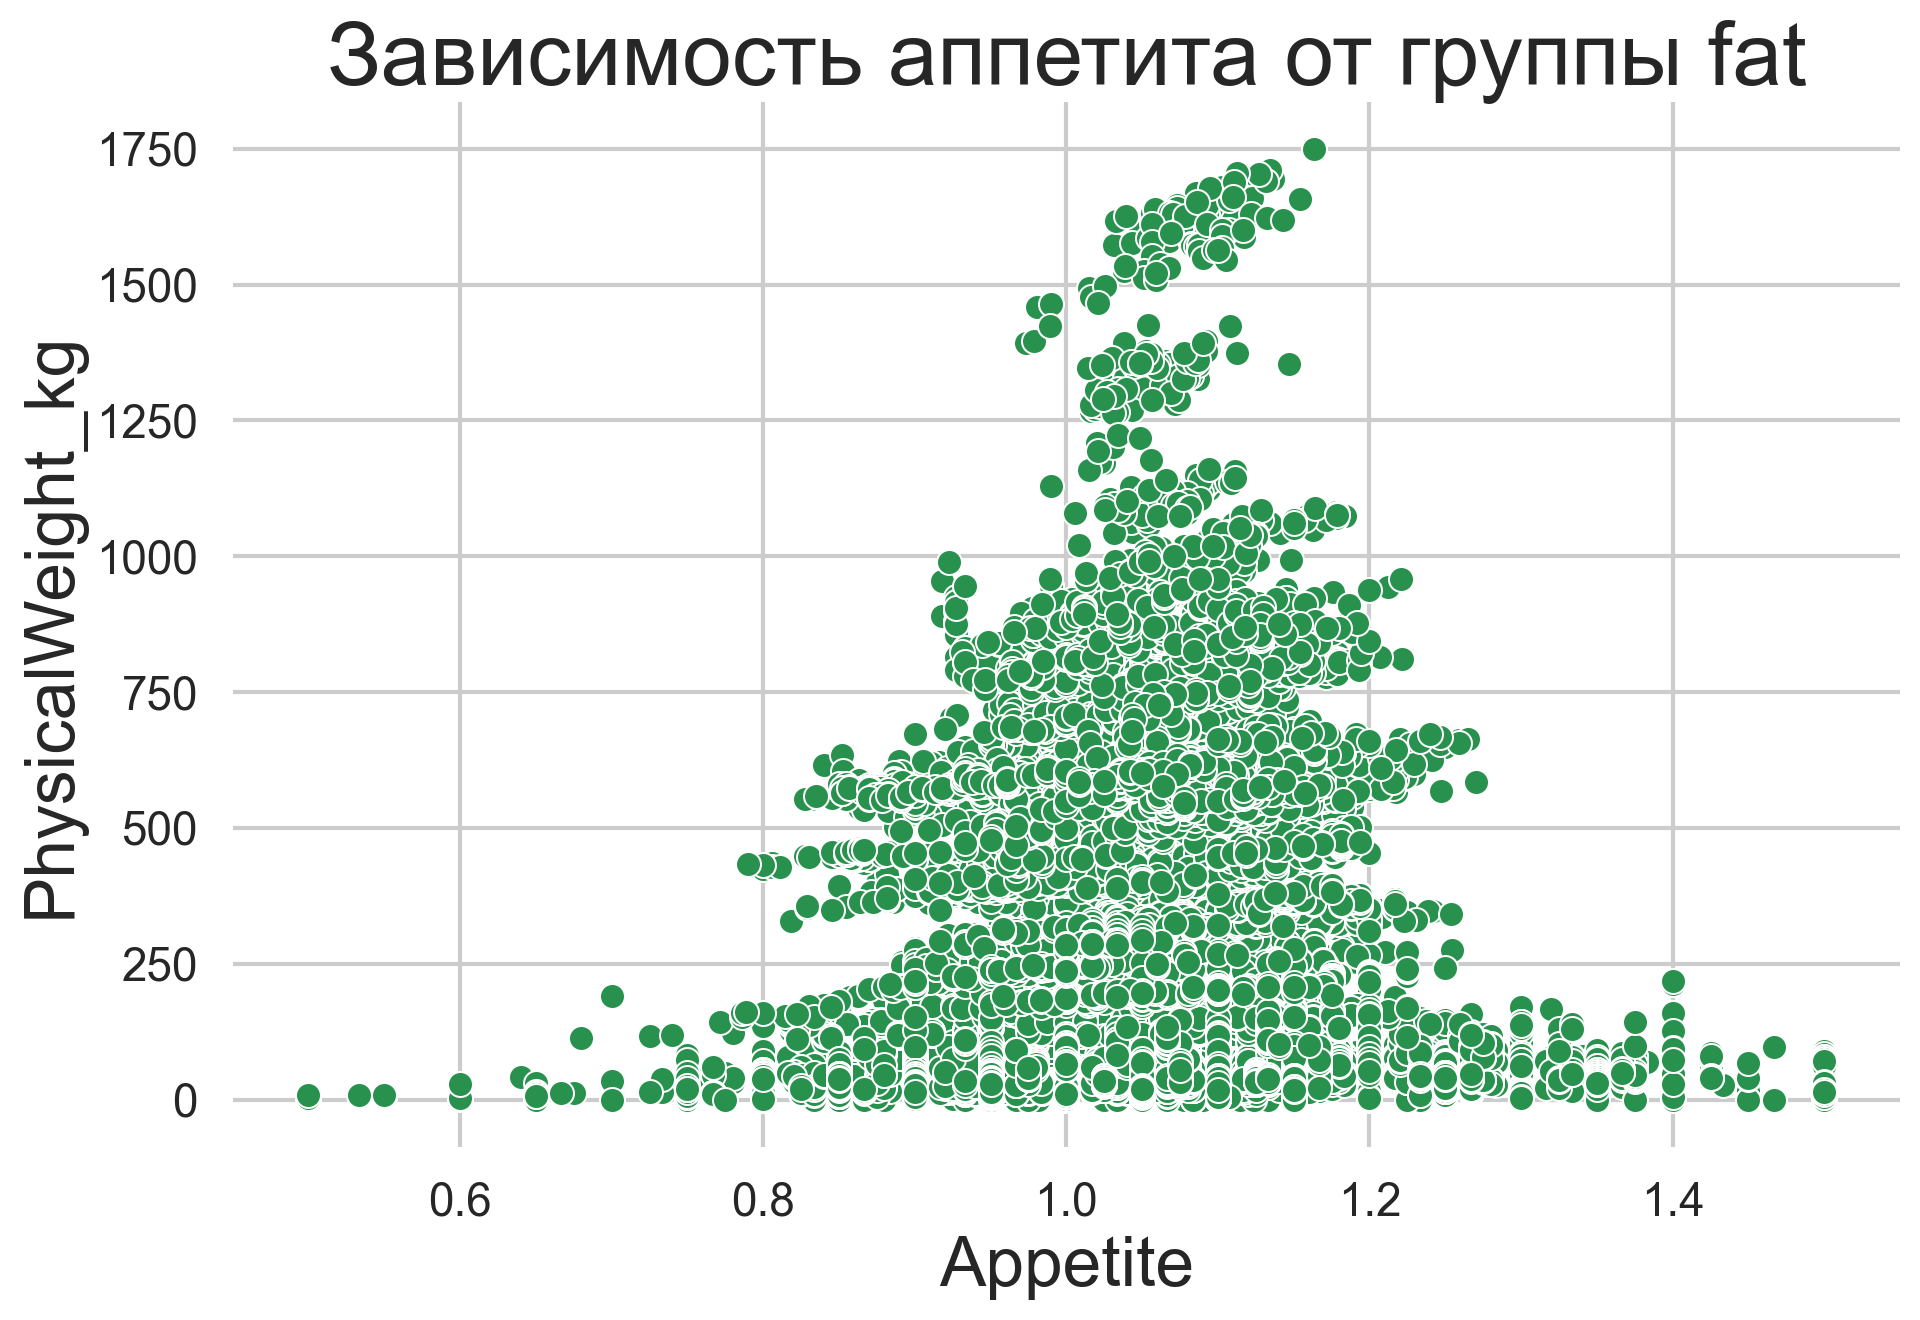

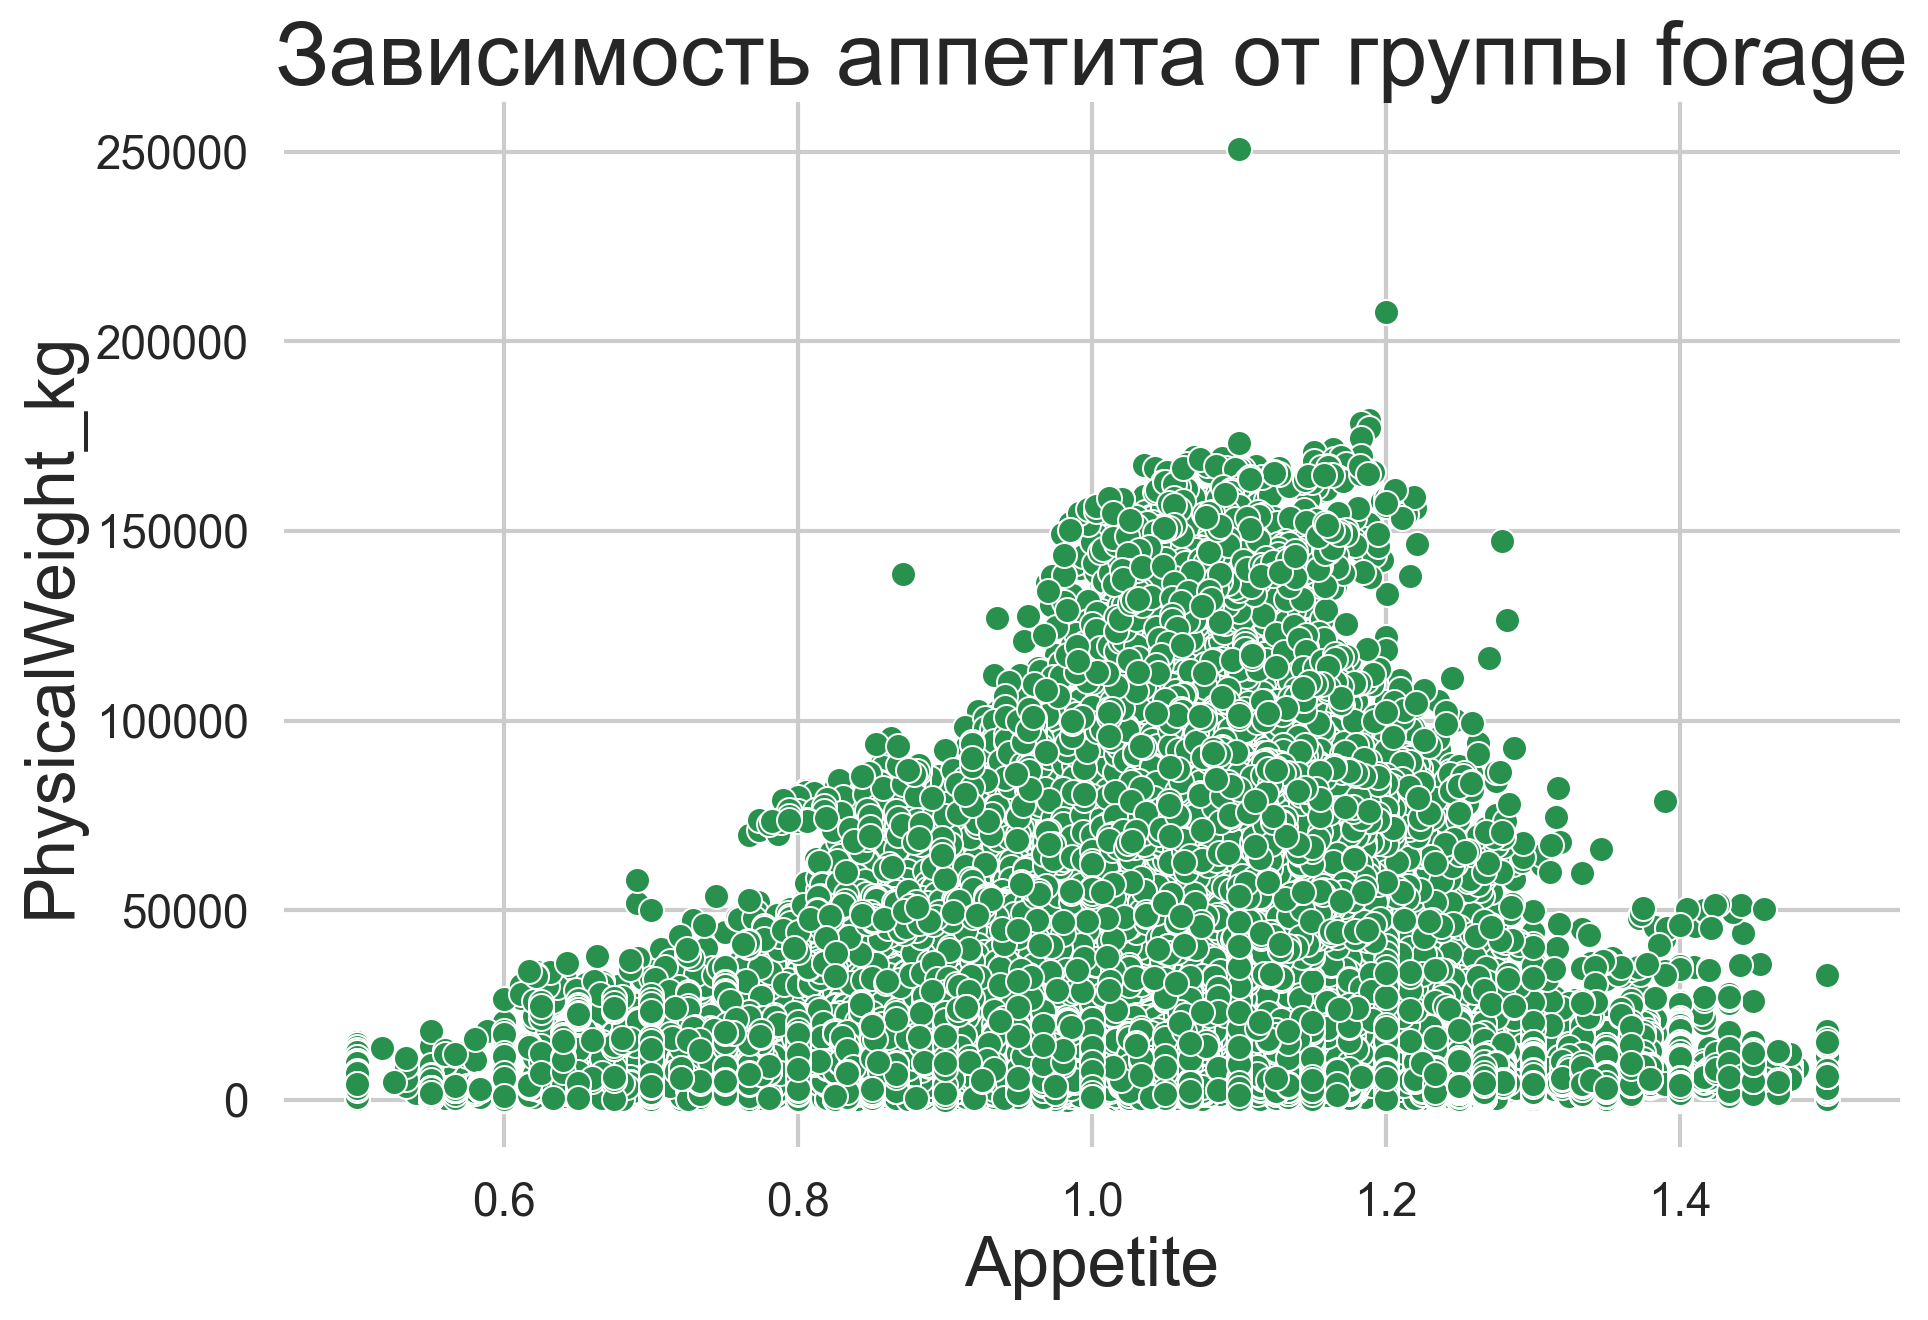

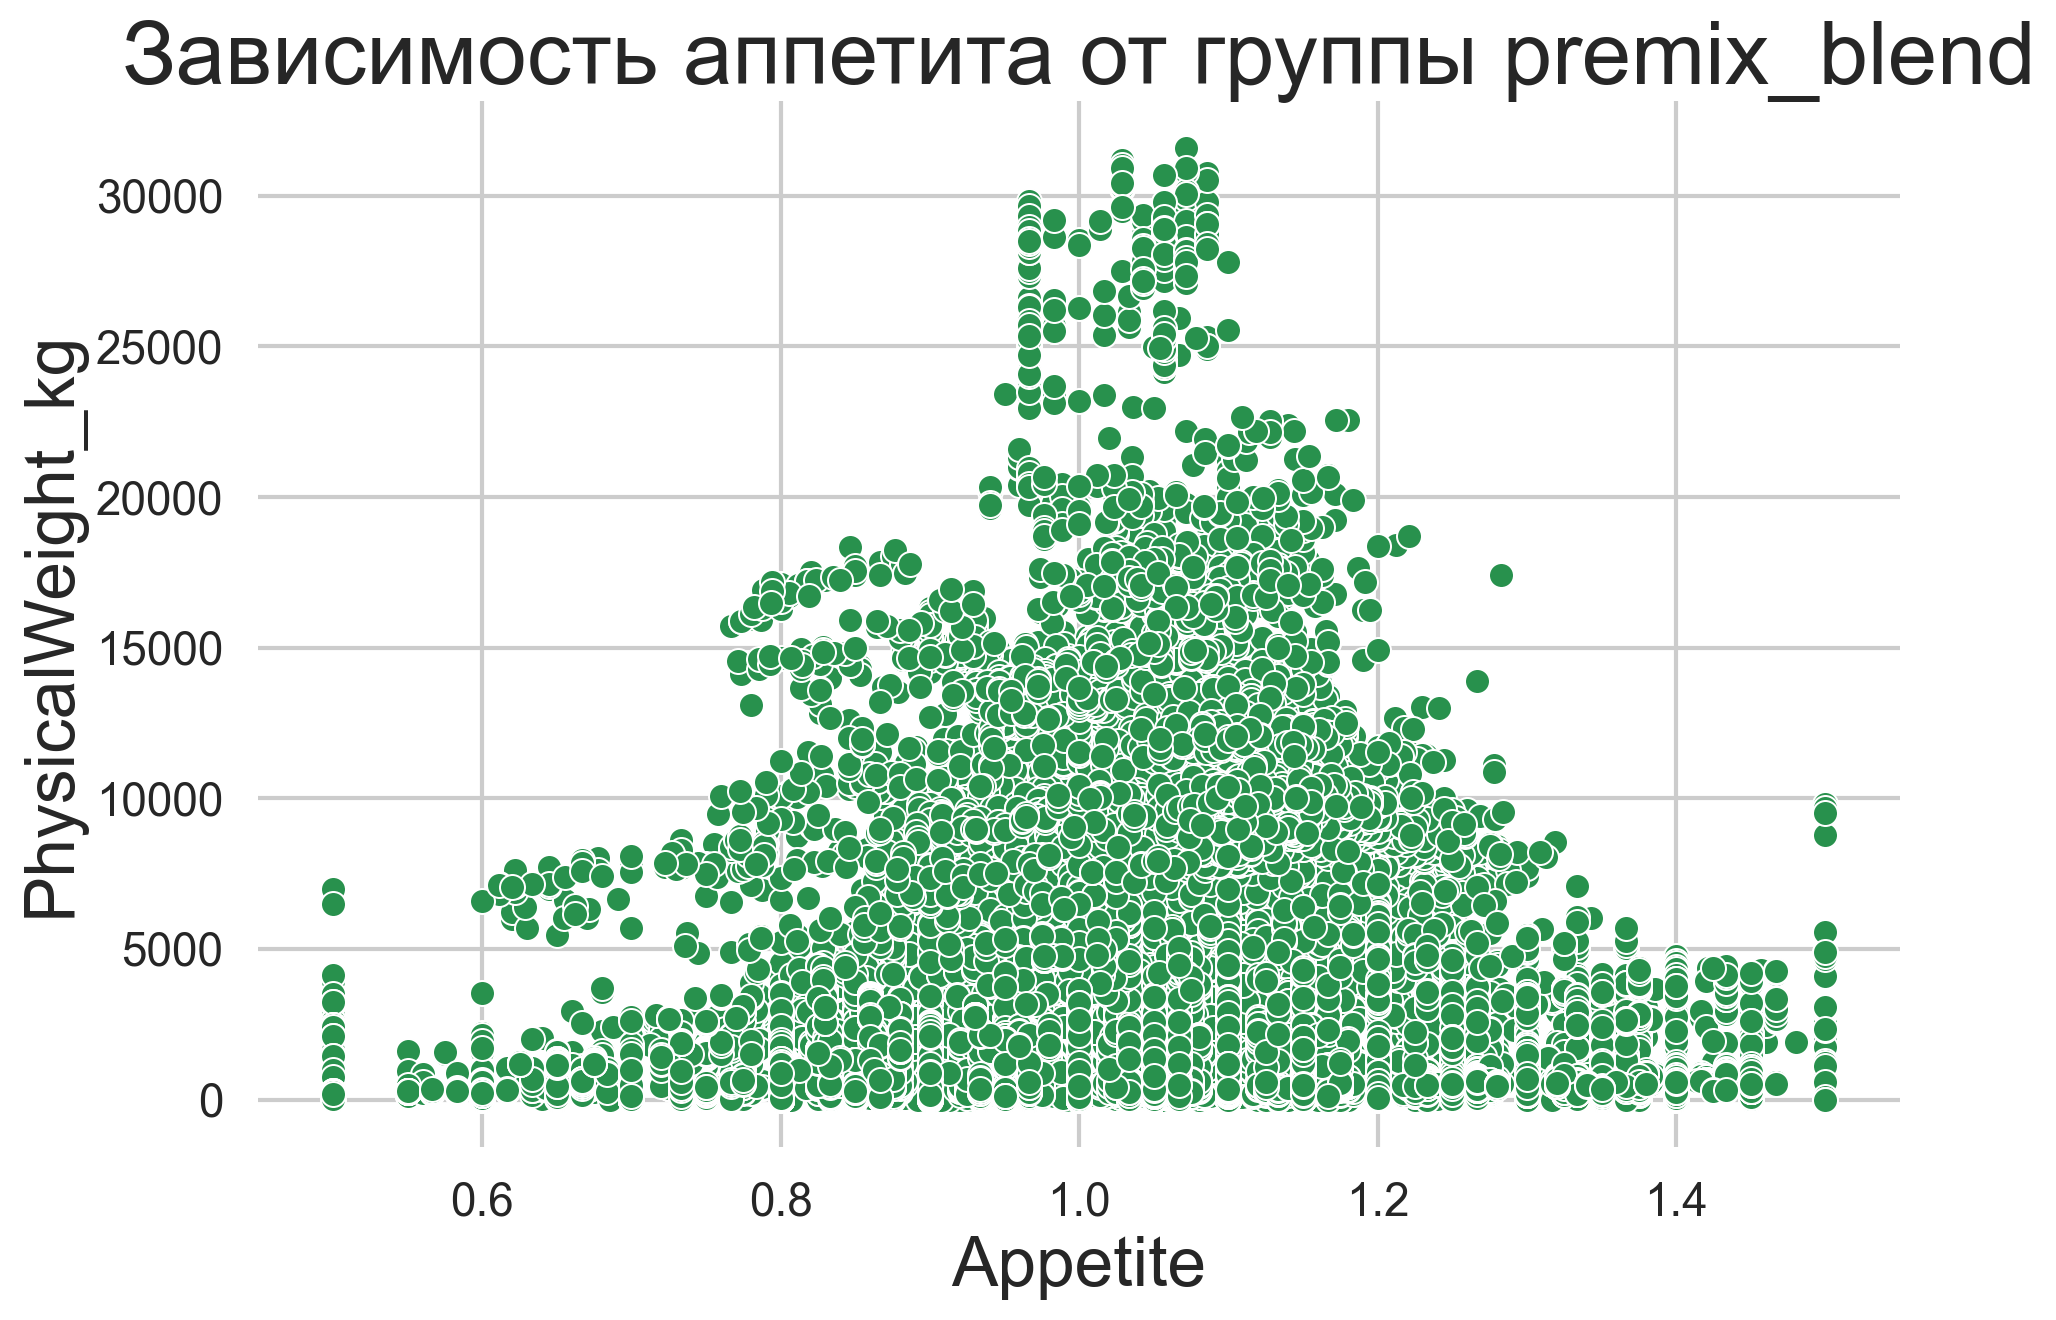

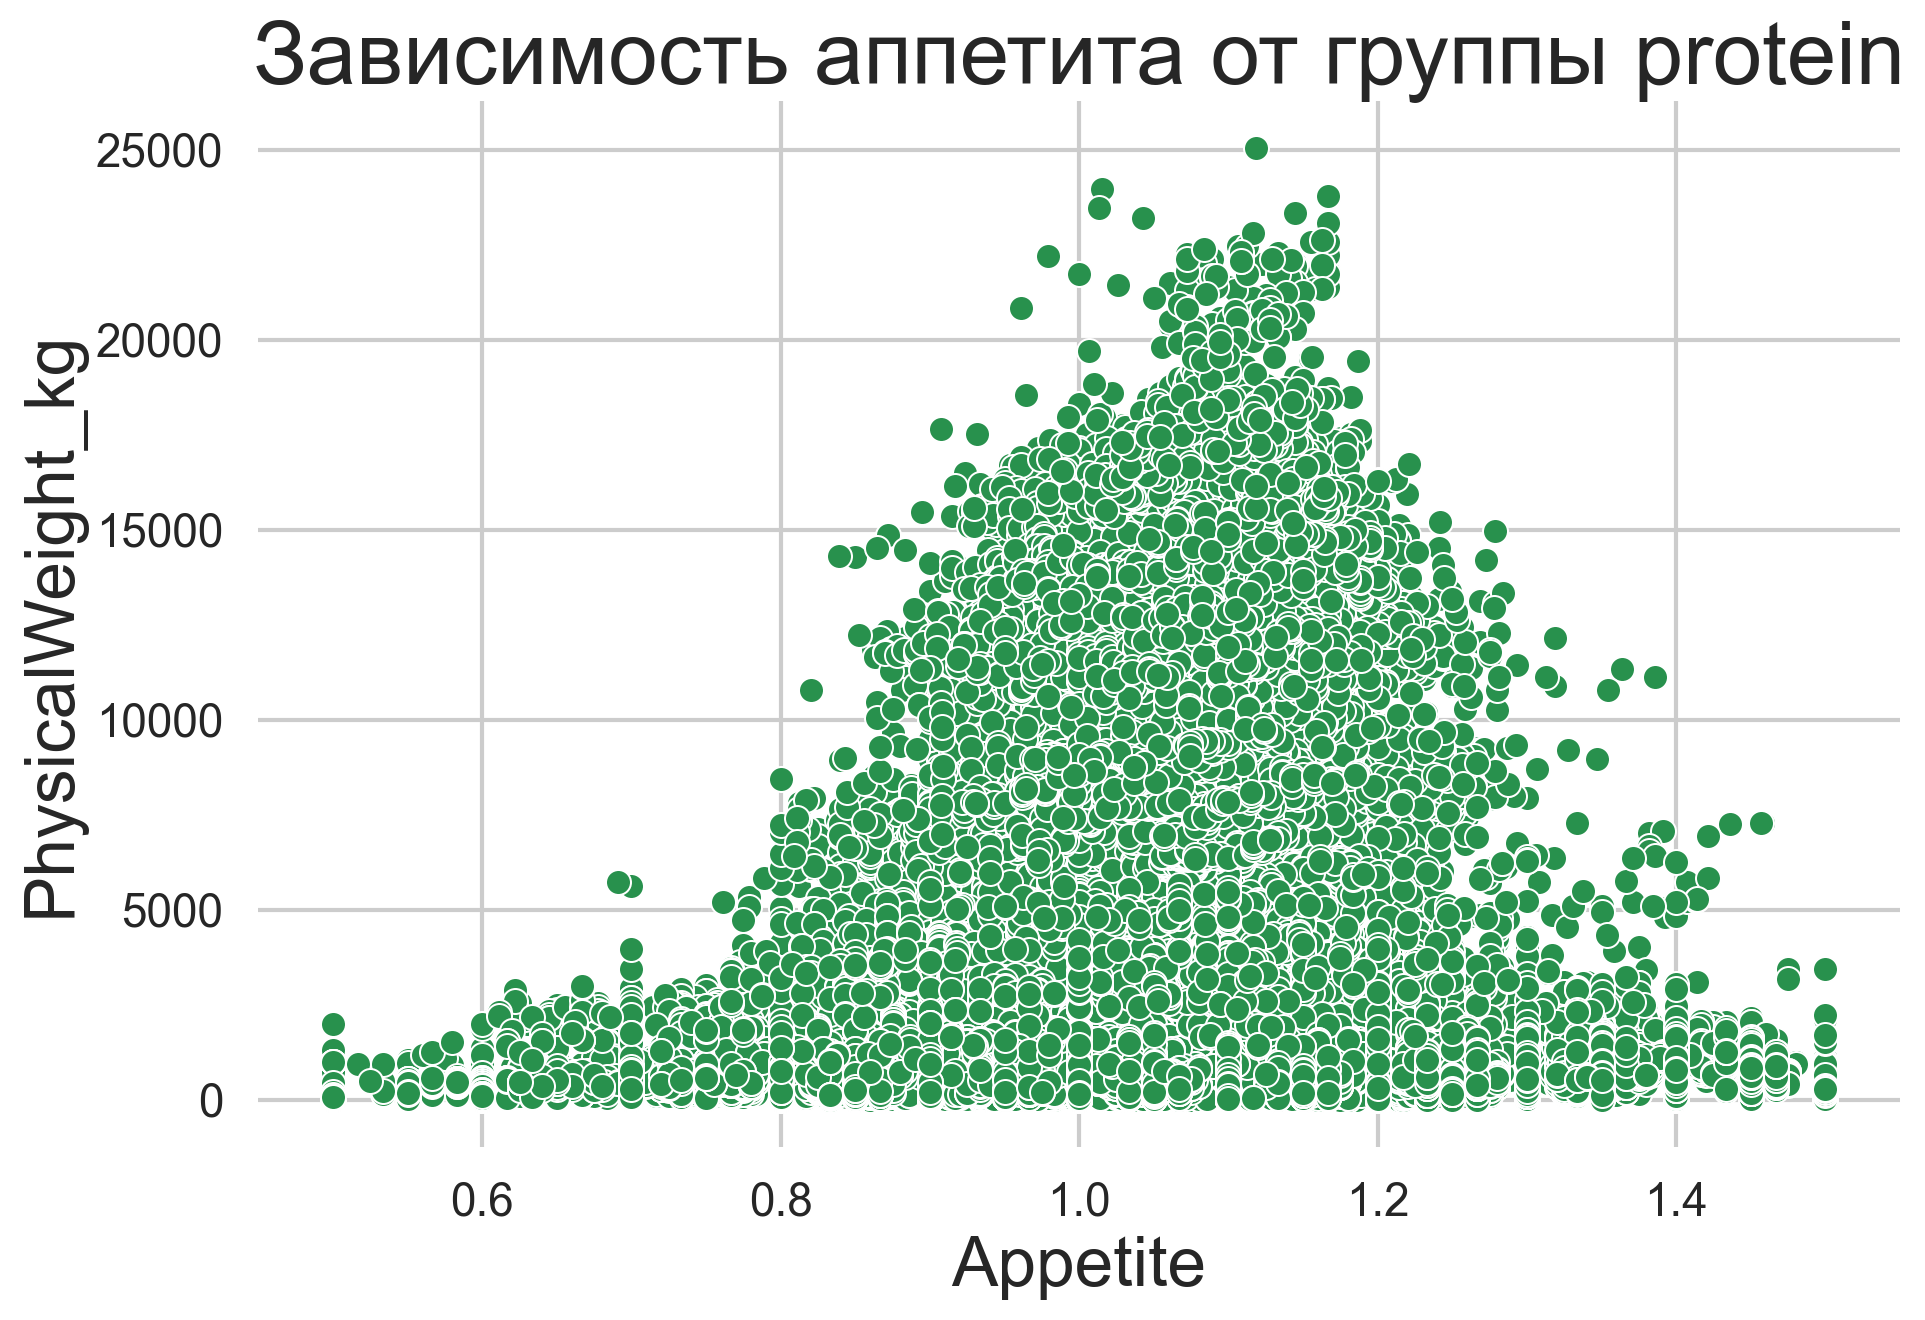

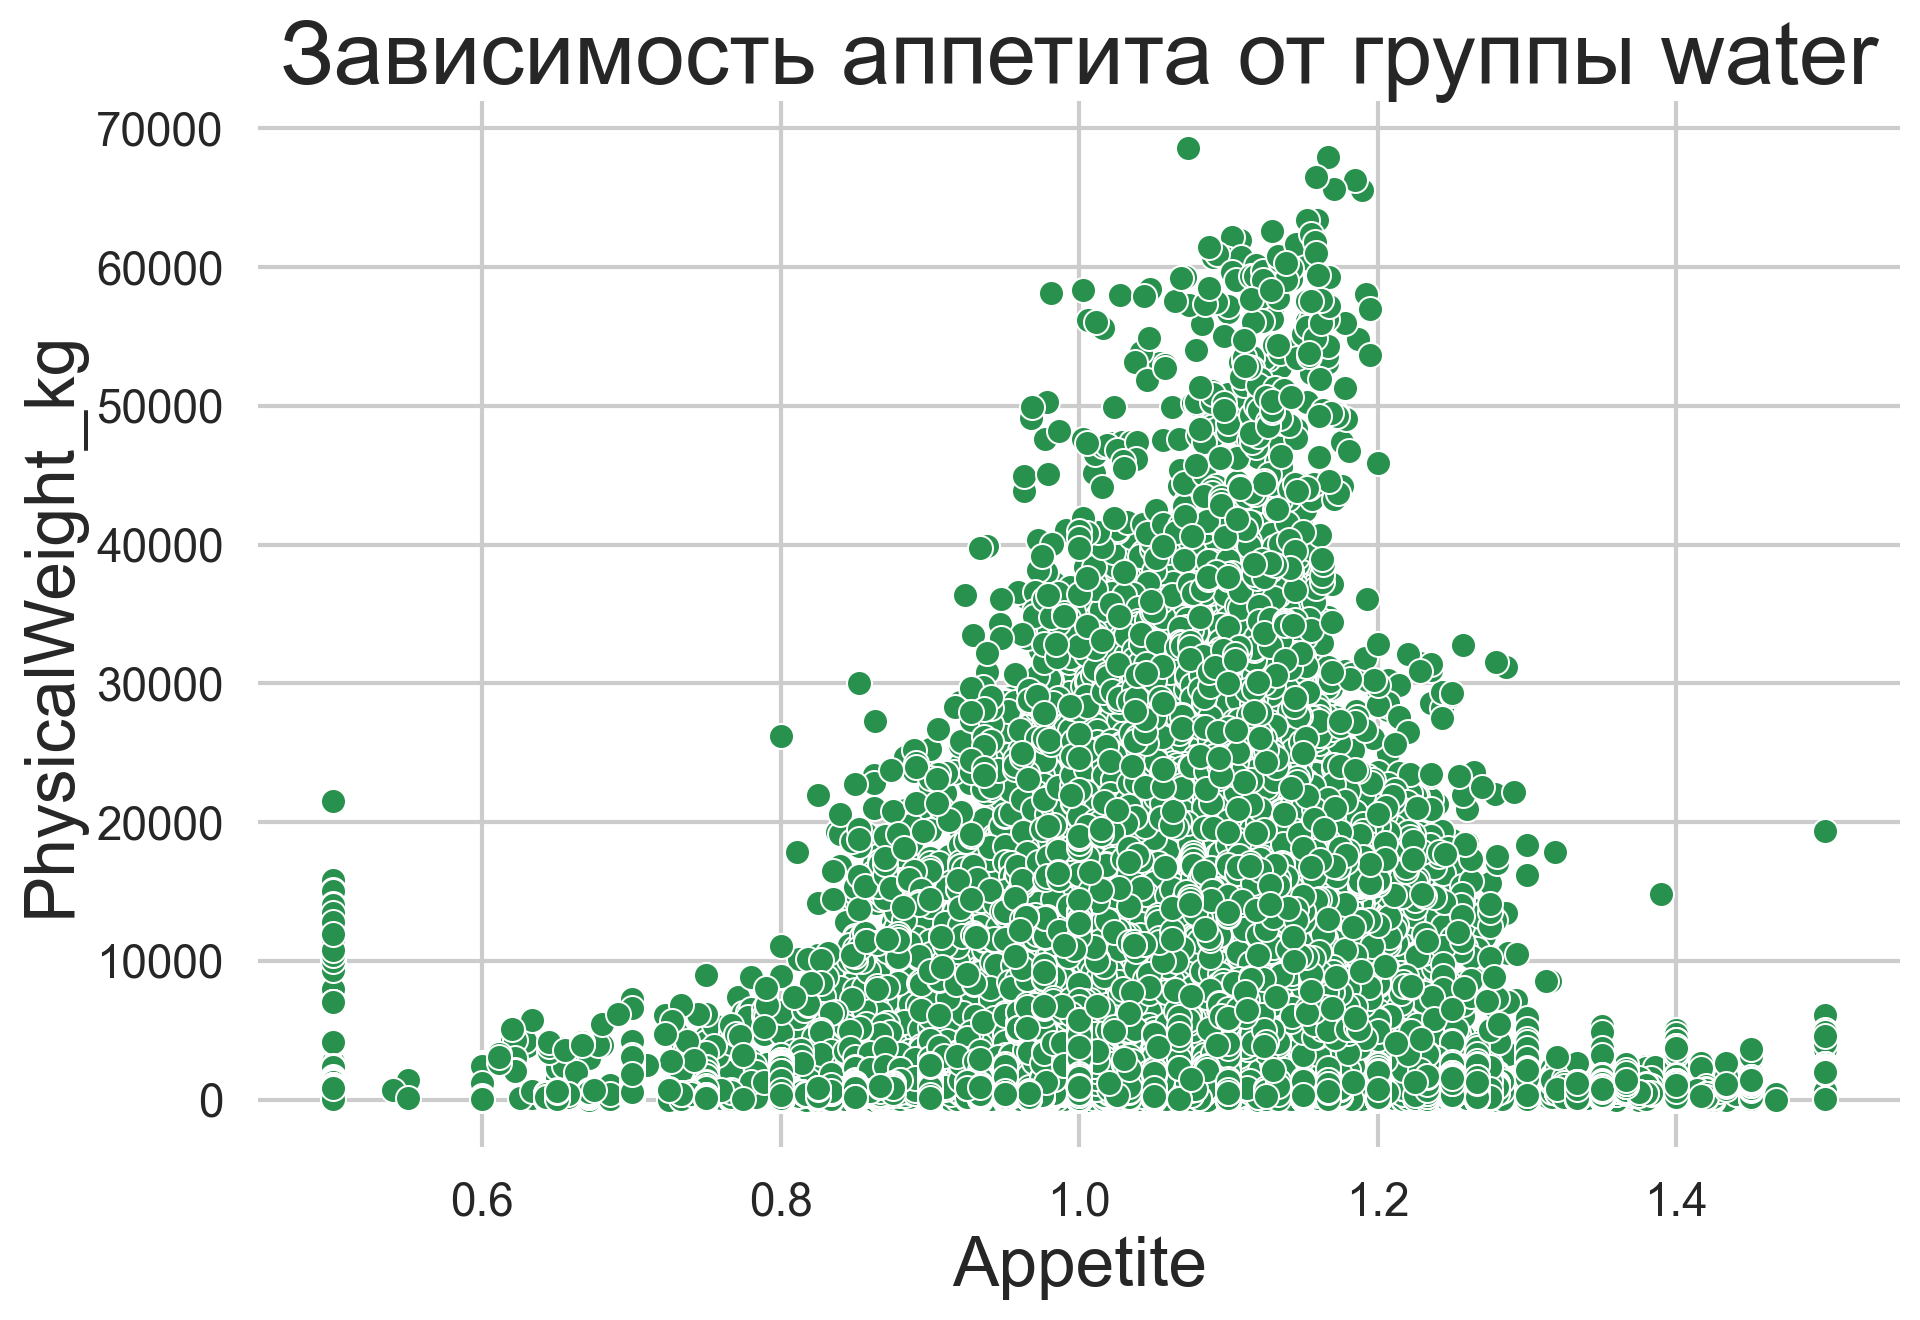

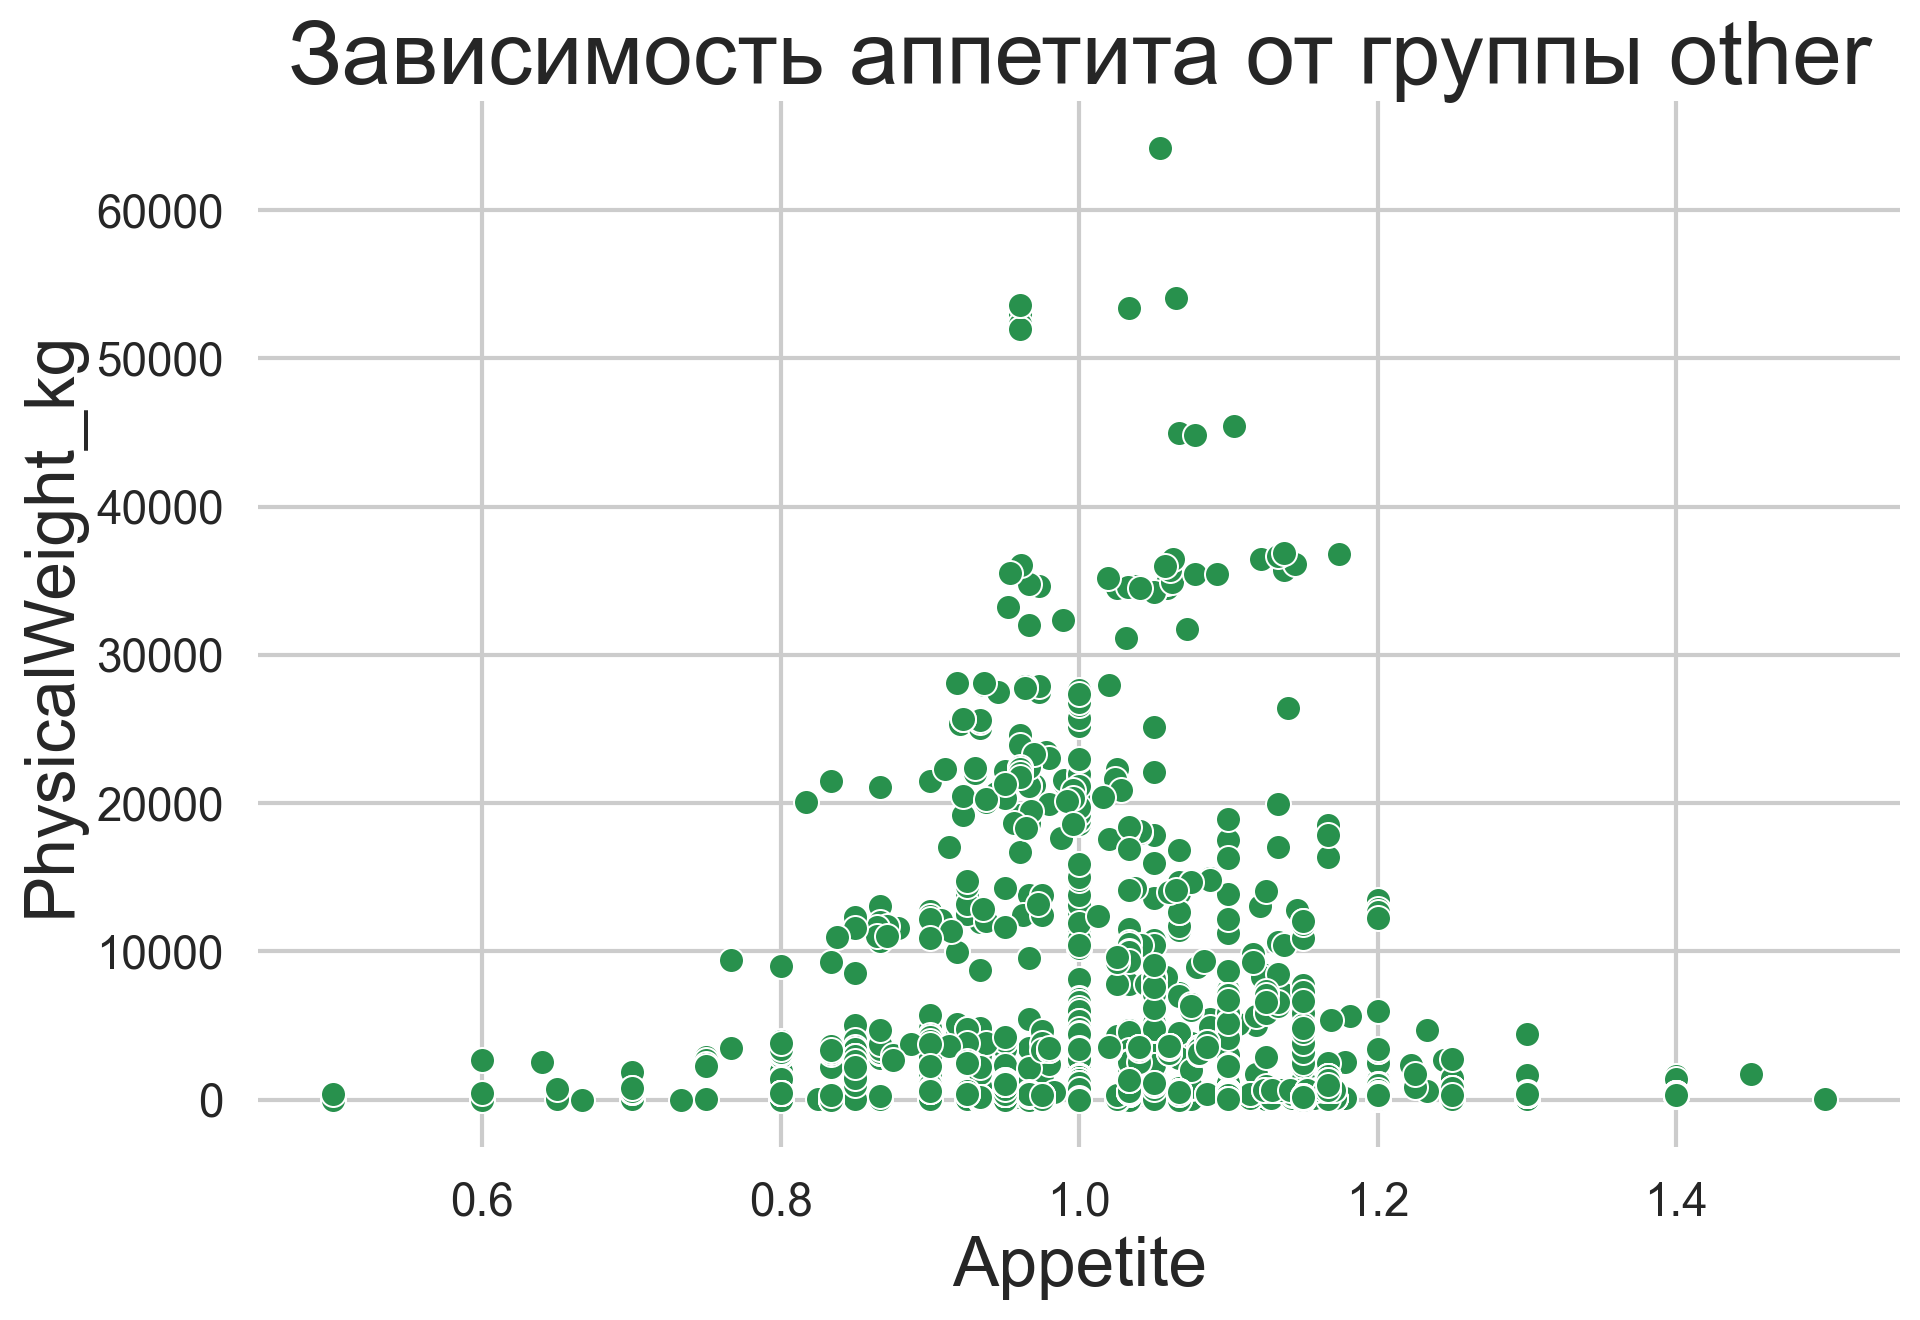

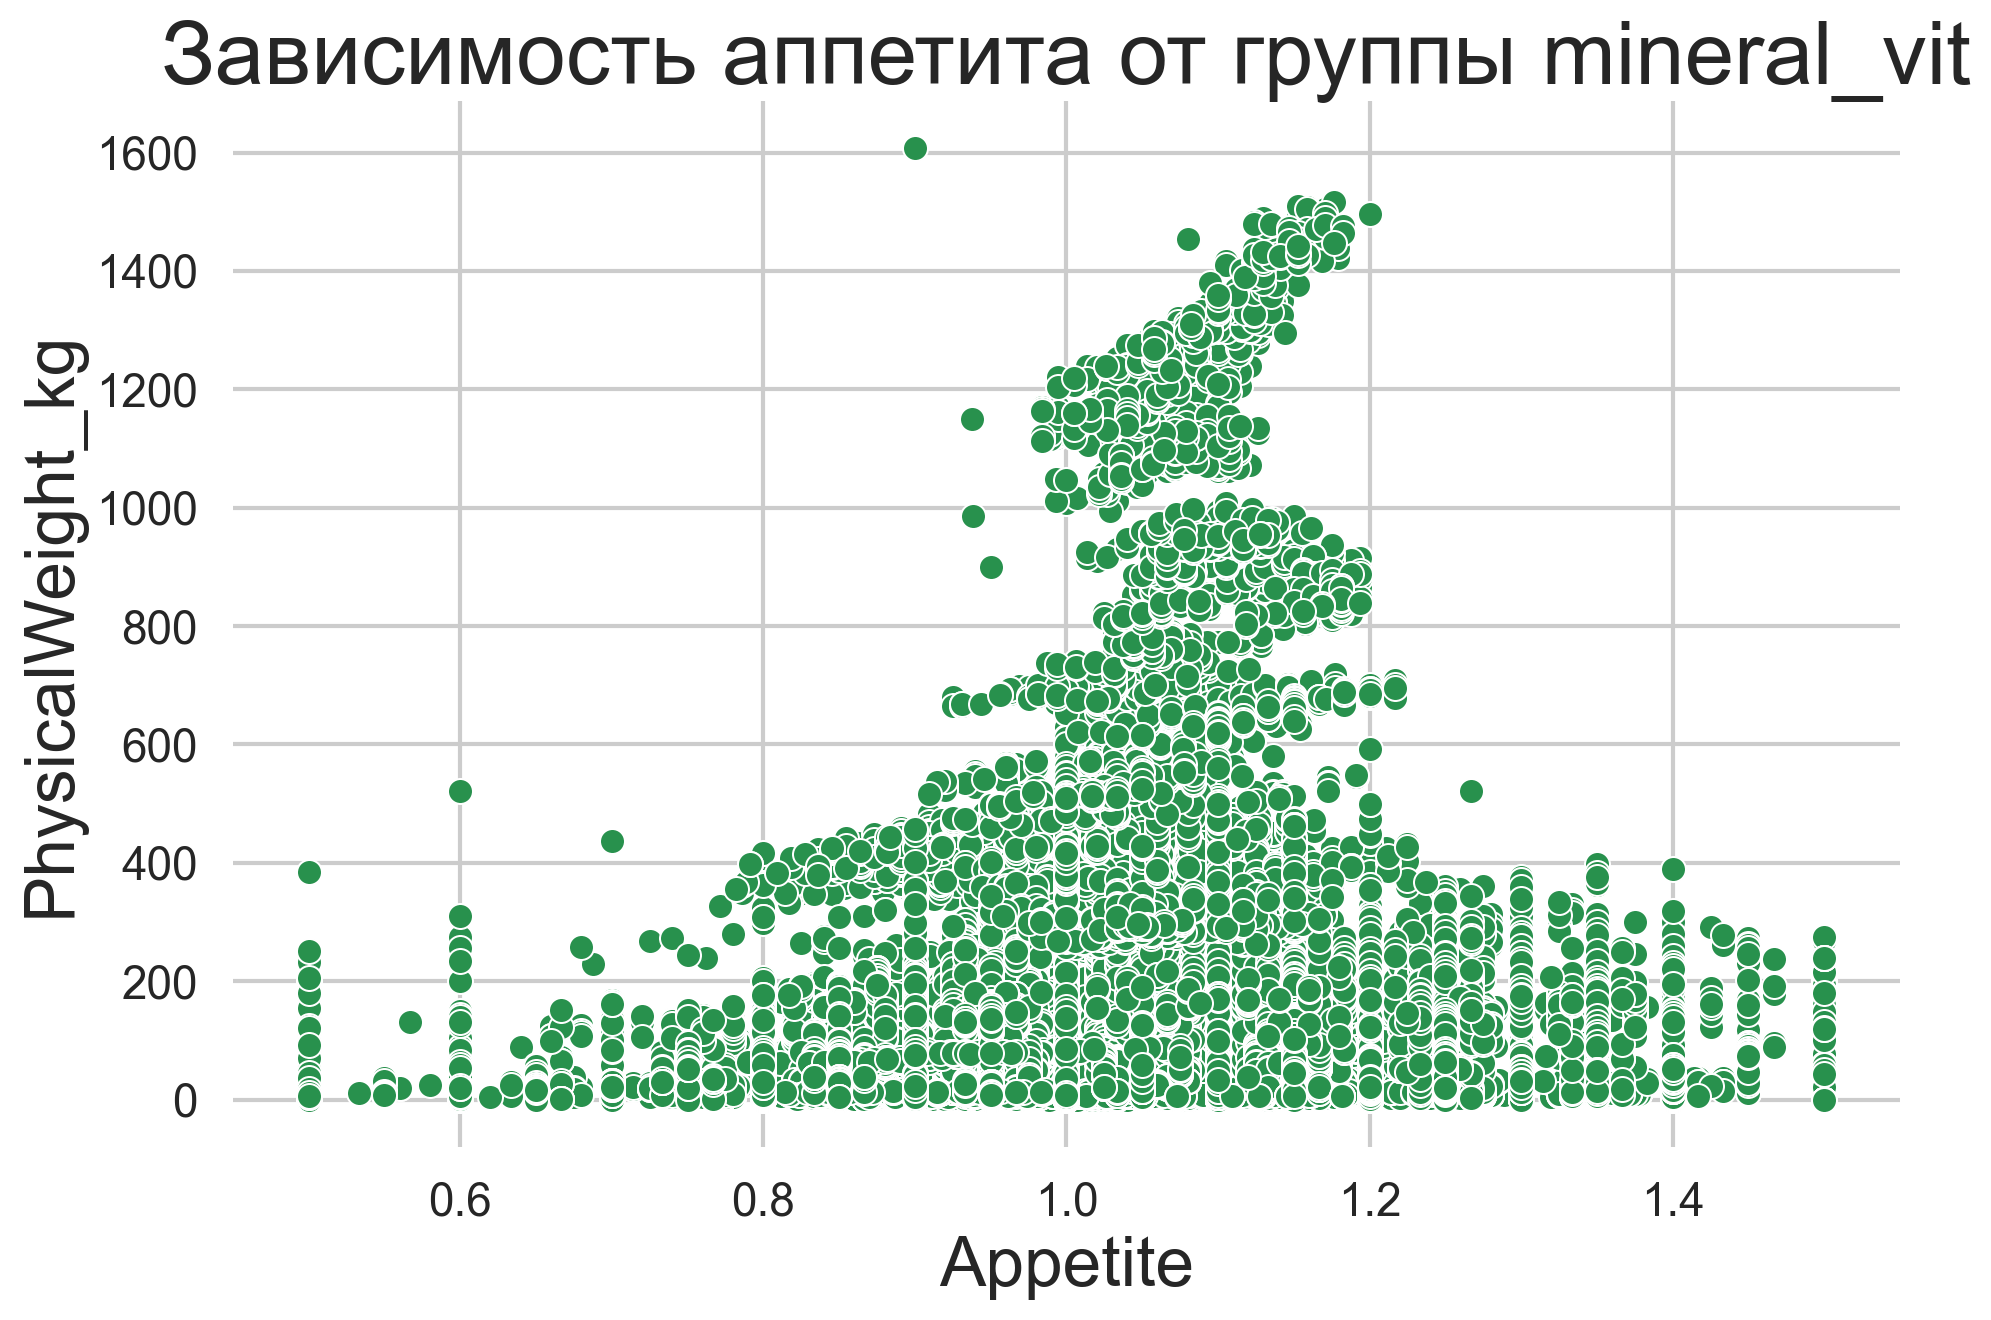

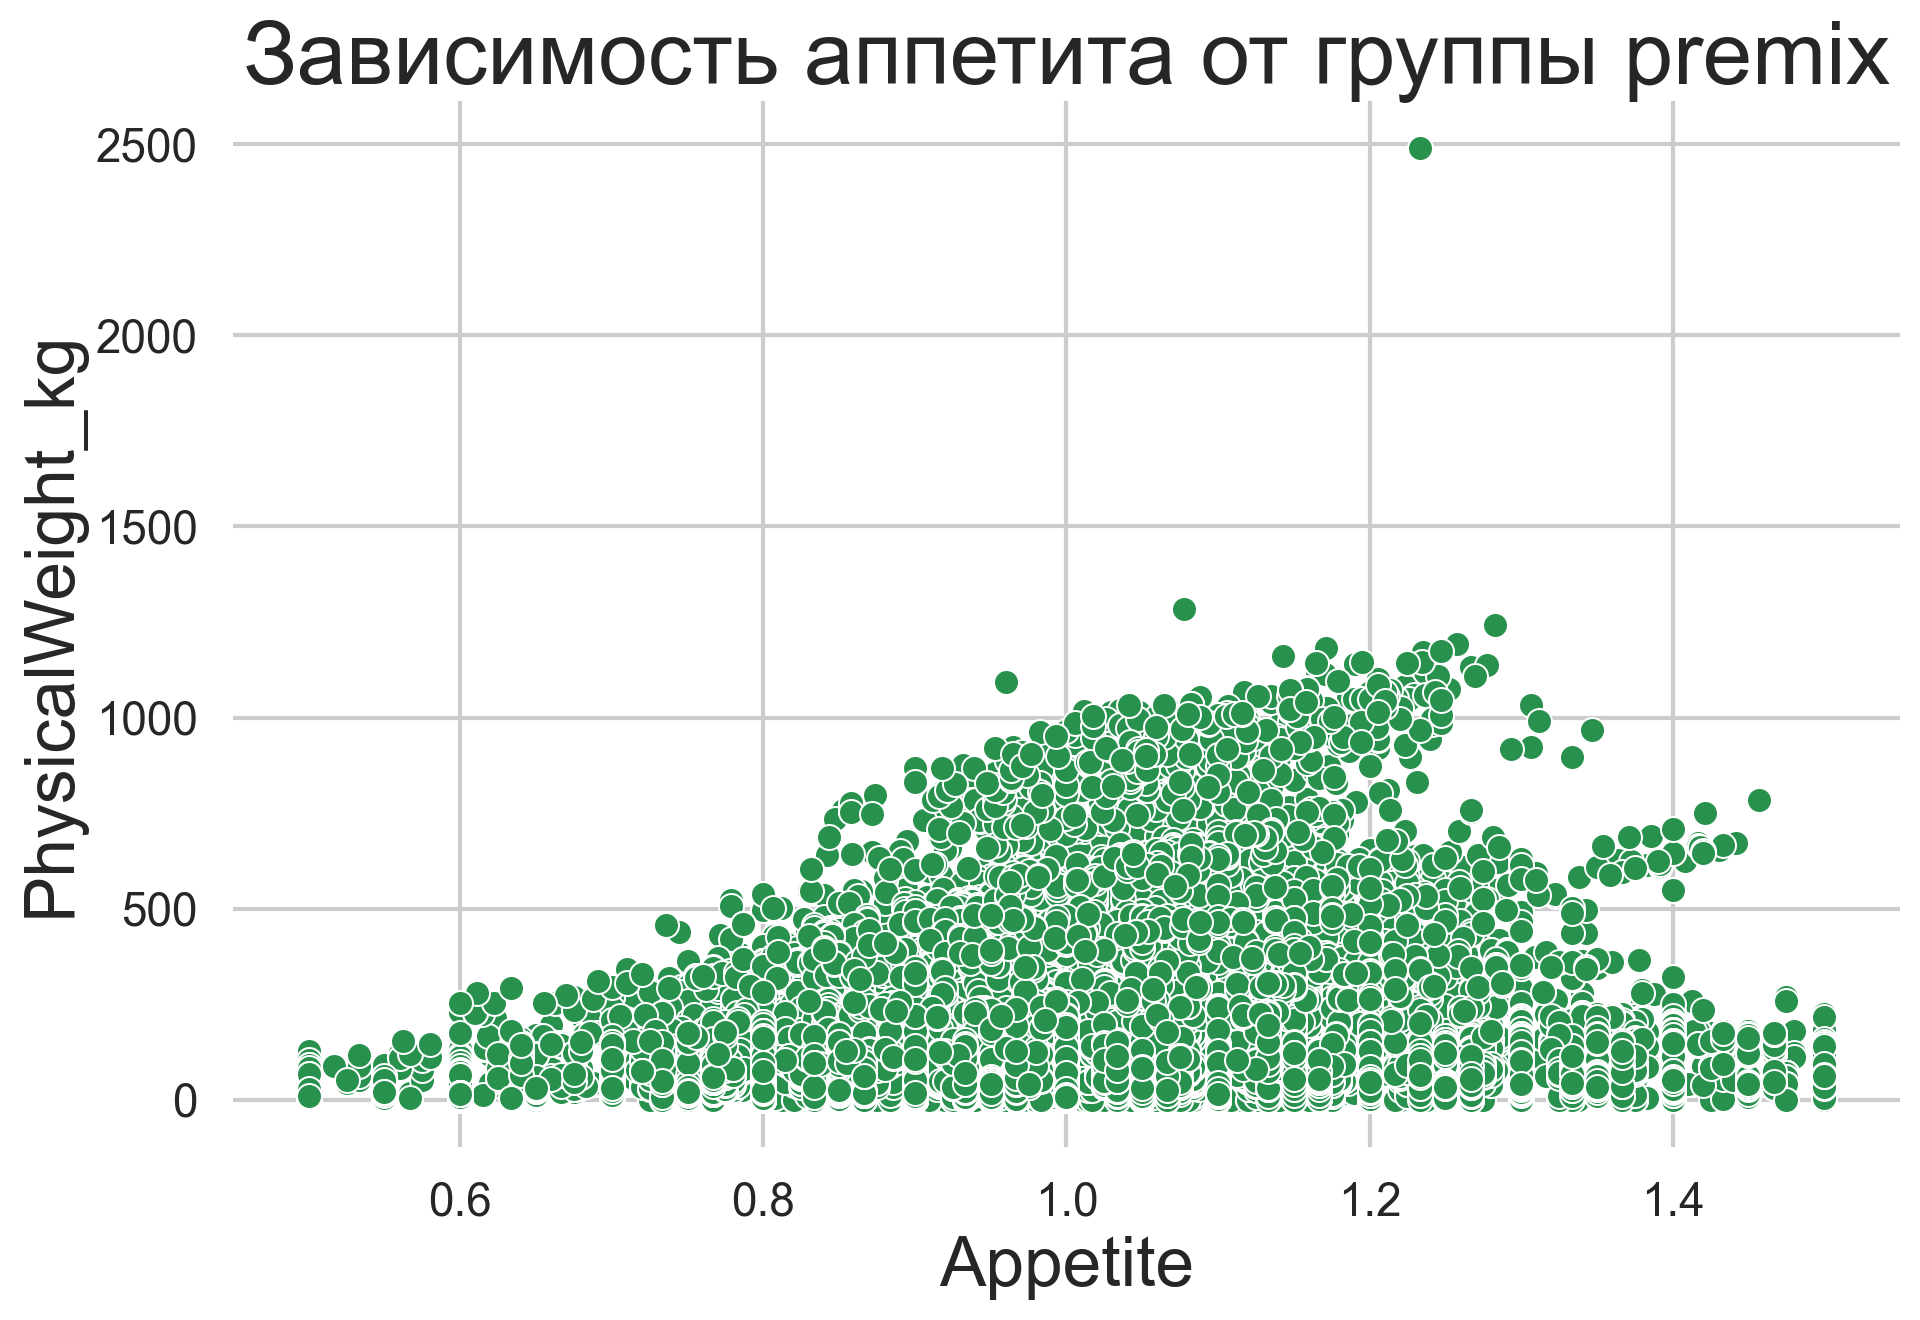

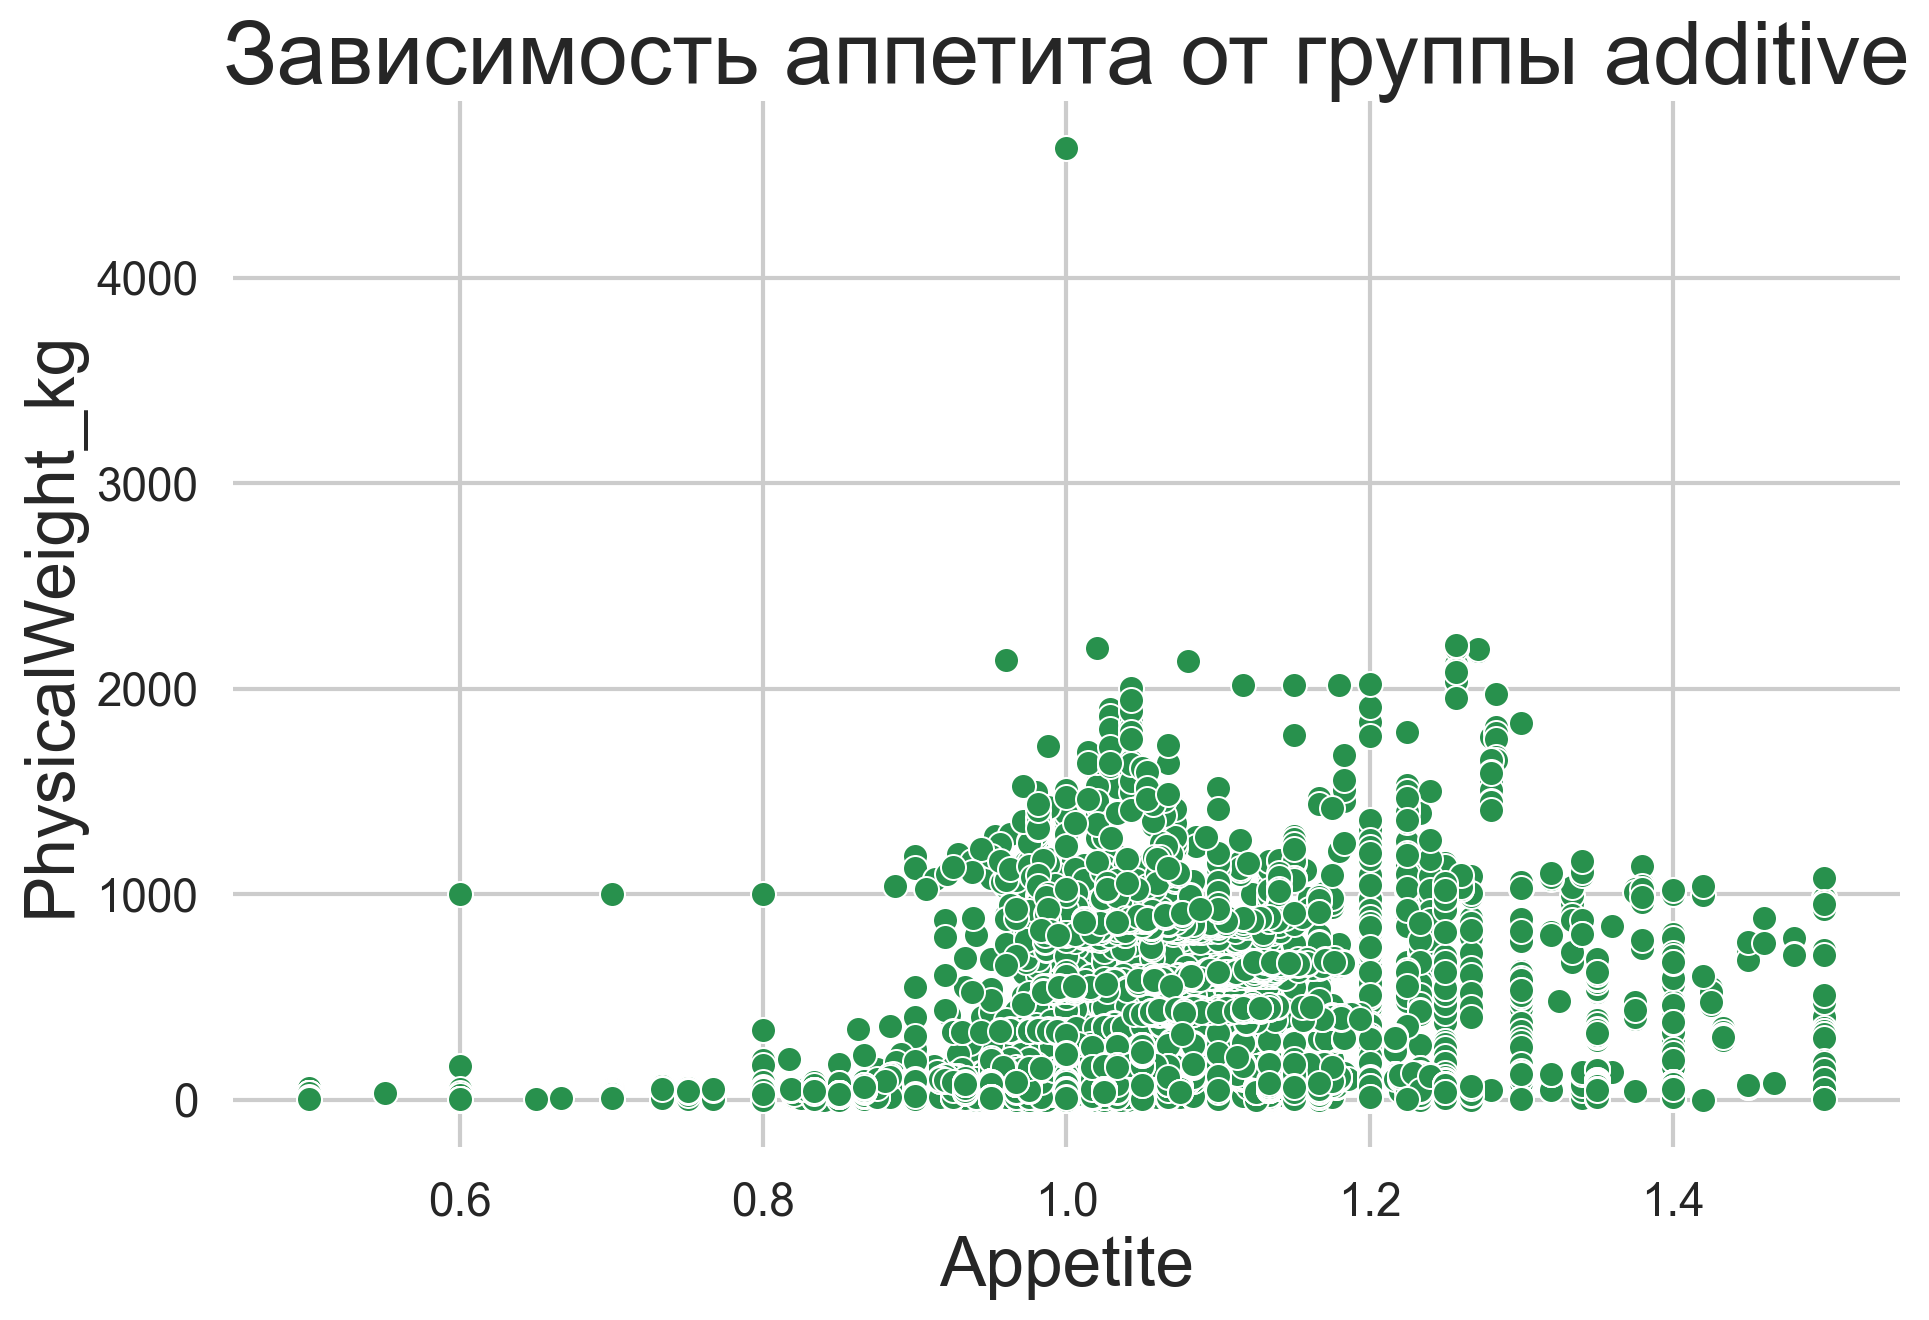

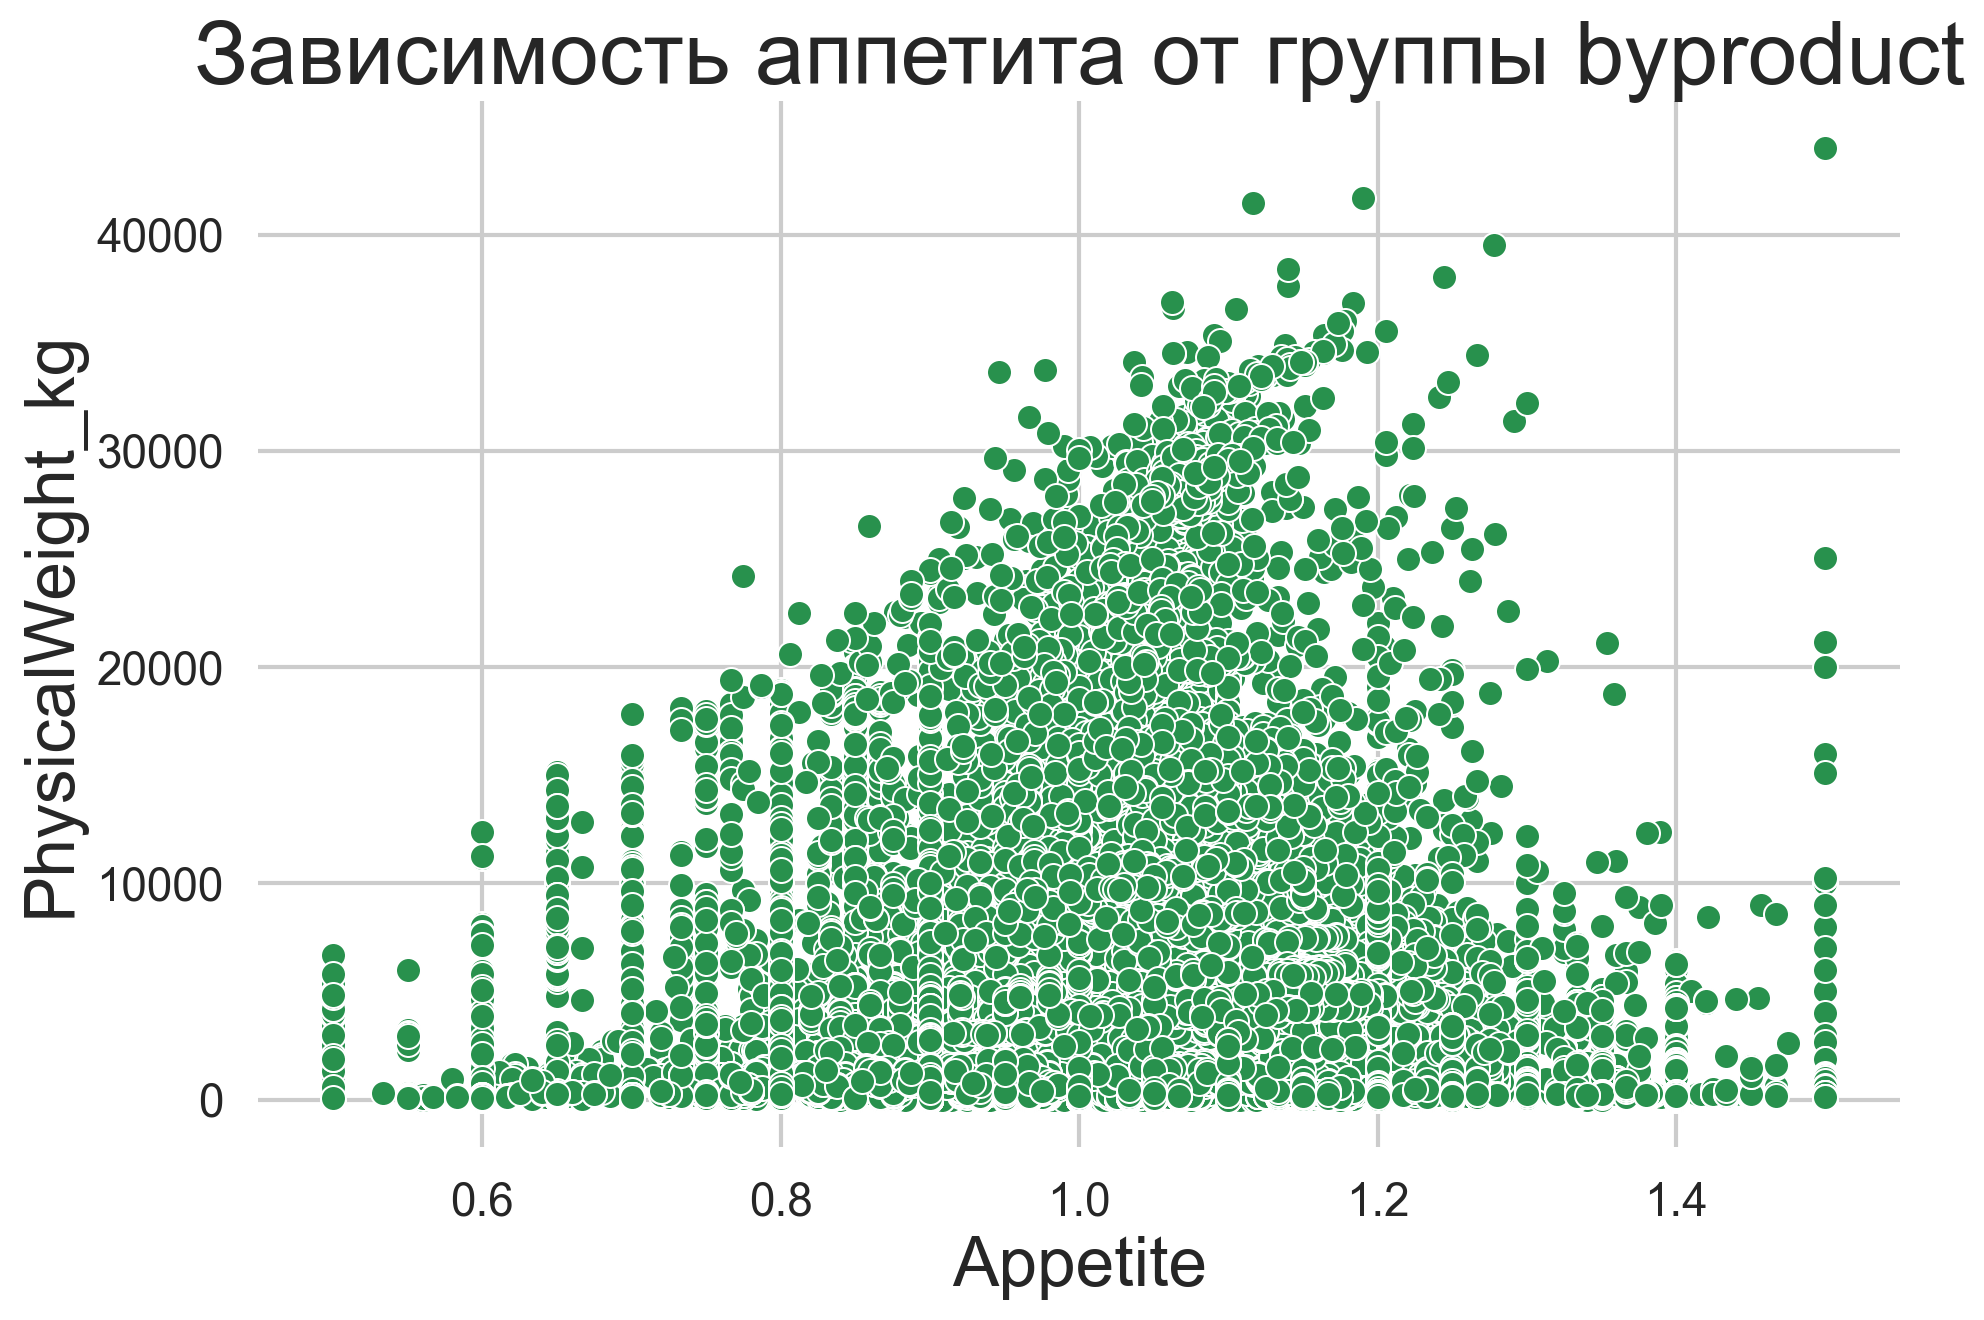

In [41]:
for k in app_ingr['ingredient_group'].unique():
    temp = app_ingr[app_ingr['ingredient_group'] == k]
    sns.scatterplot(data=temp, y='PhysicalWeight_kg', x='Appetite')
    plt.title(f"Зависимость аппетита от группы {k}")
    plt.show()

In [ ]:
monthly_vectors.info()

In [43]:
feeding_and_details.PhysiologicalGroupName.unique()

array(['Д1', 'Т3 (9-12 мес.)', 'Нетели', 'Д2', 'Т0 (0-2 мес.)',
       'Т1 (3-5 мес.)', 'Т4 (>1 года)', 'С1', 'С2', 'Д0 (Новотельные)',
       'Т2 (6-8 мес.)', 'Н Нетели', 'Д3 (Предзапуск)', 'Б0 (0-2 мес.)',
       'Т3 9-12', 'Т0', 'D3', 'Д3', 'Нетели 1  группа', 'Б3 (9-12 мес.)',
       'Т0 (3-5 мес.)', 'Д0', 'Сух-2', 'Д-3', 'Т2', 'МГ Т3', 'Т2 6-8',
       'сух 1', 'сух 2', 'С1 нетели', 'С2 нетели', 'Т4', 'Н НЕТЕЛИ', 'Т3',
       'Б2 (6-8 мес.)', 'Б1 (3-5 мес.)', 'Т4 13-20', 'Телята СВОД Навесы',
       'Сух 2 Нетели', 'МГ Т2', 'Т3 (9-12 мес)', 'МП Коровы', 'МП Нетели',
       'МП БП (бык-производитель)', 'Б4 (>1 года)',
       'МП Б1 (6-12 мес. откорм)', 'МП Т2 (>1 года откорм)',
       'МП БР2 (>1 года рем.)', 'МП БР1 (6-12 мес. рем.)',
       'МП ТР1 (6-12 мес. рем.)', 'Телята домики', 'МП Т0 (0-6 мес.)',
       'МП ТР2 (>1 года рем.)', 'МП Б0 (0-6 мес.)',
       'МП Б2 (>1 года откорм)', 'С2 Нетели', 'быки племенные', 'Лошади',
       'Т0 (0-2 мес)', 'Коровы'], dtype=object)

In [55]:
mps = feeding_and_details[feeding_and_details['PhysiologicalGroupName'].str.contains('МП')]
mps.shape

(12650, 22)

In [59]:
feeding_and_details[(feeding_and_details['IngredientType'] == 'Concentrate') | (feeding_and_details['IngredientType'] == 'VitaminMineral')]

FeedingTaskID        Date  \
2         Farms/EkoNiva1C.216d4235-2852-11e8-80c4-1c98ec...  2022-01-01   
3         Farms/EkoNiva1C.216d4235-2852-11e8-80c4-1c98ec...  2022-01-01   
4         Farms/EkoNiva1C.216d4235-2852-11e8-80c4-1c98ec...  2022-01-01   
5         Farms/EkoNiva1C.216d4235-2852-11e8-80c4-1c98ec...  2022-01-01   
6         Farms/EkoNiva1C.216d4235-2852-11e8-80c4-1c98ec...  2022-01-01   
...                                                     ...         ...   
16411353  Farms/EkoNiva1C.6c69fe1b-2b6f-11e8-80c4-1c98ec...  2025-10-22   
16411357  Farms/EkoNiva1C.6c69fe1b-2b6f-11e8-80c4-1c98ec...  2025-10-22   
16411358  Farms/EkoNiva1C.6c69fe1b-2b6f-11e8-80c4-1c98ec...  2025-10-22   
16411362  Farms/EkoNiva1C.6c69fe1b-2b6f-11e8-80c4-1c98ec...  2025-10-22   
16411363  Farms/EkoNiva1C.6c69fe1b-2b6f-11e8-80c4-1c98ec...  2025-10-22   

               FarmName  FeedNumber  SectionID  PhysiologicalGroupID  \
2            ЖК Добрино          15          9                     2   
3            ЖК Добрино          15          9                     2   
4            ЖК Добрино          15          9                     2   
5            ЖК Добрино          15          9                     2   
6            ЖК Добрино          15          9                     2   
...                 ...         ...        ...                   ...   
16411353  ЖК Подболотье          18        139                     7   
16411357  ЖК Подболотье          19        103                     7   
16411358  ЖК Подболотье          19        103                     7   
16411362  ЖК Подболотье          20        131                     1   
16411363  ЖК Подболотье          20        131                     1   

         PhysiologicalGroupName  PhysiologicalGroupHeadCount  Appetite  \
2                            Д1                          352       0.9   
3                            Д1                          352       0.9   
4                            Д1                          352       0.9   
5                            Д1                          352       0.9   
6                            Д1                          352       0.9   
...                         ...                          ...       ...   
16411353                     С1                           37       1.3   
16411357                     С1                           37       1.4   
16411358                     С1                           37       1.4   
16411362                 Нетели                           32       1.2   
16411363                 Нетели                           32       1.2   

         RationName  RationPart  TotalWeight_kg                  CompletedAt  \
2                Д1         0.5          8324.0  2022-01-03T05:45:50.5175580   
3                Д1         0.5          8324.0  2022-01-03T05:45:50.5175580   
4                Д1         0.5          8324.0  2022-01-03T05:45:50.5175580   
5                Д1         0.5          8324.0  2022-01-03T05:45:50.5175580   
6                Д1         0.5          8324.0  2022-01-03T05:45:50.5175580   
...             ...         ...             ...                          ...   
16411353         С1         1.0          1435.0  2025-10-22T08:53:09.7102933   
16411357         С1         1.0          1601.0  2025-10-22T08:51:09.2068847   
16411358         С1         1.0          1601.0  2025-10-22T08:51:09.2068847   
16411362         С1         1.0          1106.0  2025-10-22T08:50:05.2368034   
16411363         С1         1.0          1106.0  2025-10-22T08:50:05.2368034   

          year  IngredientID          IngredientName  IngredientType  \
2         2022          72.0     Комбикорм 10 группы     Concentrate   
3         2022          82.0          Кукуруза сухая     Concentrate   
4         2022         129.0       Шрот подсолнечный     Concentrate   
5         2022         792.0             Шрот соевый     Concentrate   
6         2022         162.0           Жмых рапсовый     Concentrate  

In [56]:
feeding_and_details.shape

(16411365, 22)

In [57]:
feeding_and_details.IngredientType.unique()

array(['Forage', 'Concentrate', 'VitaminMineral', 'Water', 'Medication',
       nan, 'Premixture'], dtype=object)